#Problem Definitions and Research Questions#

**Background information:** I am a data scientist working for Thera bank. The bank aims to keep their customers who use credit card services, because credit cards are a good source of income for them. They charge various types of fees for credit card users, including annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and so on. As expected, Thera bank do not want to lose profits by losing their credit card users. 

**Problem definition:** The Thera bank has recently experienced a dramatic increase in customer attrition rate. In other words, they are losing their customers, hence profits. They want to understand why customer attrition has increased suddenly.

**Research questions:**



1.   What are the factors that lead to increased customer attrition in Thera bank?
2.   What are the shared characteristics and attributes of the customers who left the bank's credit card services?
3.   What is the best classification model that would help the bank improve its services?
4.   What are some business strategies that the Thera bank may use in order to reduce and minimize customer attrition?









#Data Background and Contents#

##Importing important libraries##

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Below splits data, imputes missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Importing various ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading the file and introduction to the dataset##

In [ ]:
bank=pd.read_csv('/content/drive/MyDrive/datasets/BankChurners.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
print(f'There are {bank.shape[0]} rows and {bank.shape[1]} columns in the dataset')

There are 10127 rows and 21 columns in the dataset


**Comment**: I am going to split the data into three sets which are train, validation, and test, because the data is large enough to be splitted into three.


In [ ]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# We can also check for the percentage of missing values in each column to have a better picture of the situation

pd.DataFrame(data={'% of Missing Values':round(bank.isna().sum()/bank.isna().count()*100,2)})

,% of Missing Values
CLIENTNUM,0.0
Attrition_Flag,0.0
Customer_Age,0.0
Gender,0.0
Dependent_count,0.0
Education_Level,15.0
Marital_Status,7.4
Income_Category,0.0
Card_Category,0.0
Months_on_book,0.0


There are total of 21 columns and 10,127 observations in the dataset.

Moreover, the following columns have some missing values:

Education_Level column has 15% missing values out of the total observations.

Marital_Status column has 7.4% missing values out of the total observations.

Because those are categorical variables, I will impute the missing values with mode, when I split them into three sets. If I do it that, it would cause data leakage.

In [ ]:
# I will drop CLIENTNUM, because it is not a meaningful variable for the purposes of statistical analysis

bank.drop('CLIENTNUM', axis=1, inplace=True)

In [ ]:
# The code below will check the number of unique values in each variable

bank.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

There is nothing seem weird in terms of the number of unique values. It is expected that numerical variables tend to have many unique values, whereas categorical variables tend to have unique values as many as the number of unique categories which is usually low. 

In [ ]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397




*   Many of the numerical variables seem to have outliers, because the difference between their max value and the value at 75th percentile is big. For example, the value at 75th percentile is 4741 for the variable Total_Trans_Amt, whereas its max value is 18484. This is true for the difference between min values and the value at 25th percentile for some variables such as Avg_Open_To_Buy. Those issues should be explored further. 

*   There is a big difference between the values of mean and median (50th percentile) in most of the variables, indicating a potential skewness issues which should be taken care of properly.

*   There is no missing value in any of the numerical variables, which is good news!





In [ ]:
# I will look at the unique categories in each categorical variable to see if there is something fishy.

bank_cat_col=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for column in bank_cat_col:
    print(bank[column].value_counts())
    print('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------




*   The income category variable has the dollar sign and the letter K. However, because it is a categorical variable, I don't need to pre-process them. 
*   The income category variable has the value of abc. I will treat it as missing value and replace it with NaN. Also, I will impute it with SimpleImputer while building the model, not now. 
*   The other variables seem normal





In [ ]:
bank.duplicated().sum()

0

There is no duplicated row

In [ ]:
bank[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]=bank[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']].astype('category')

In [ ]:
# I am going to encode the categorical outcome variable and make it numerical, so I can build a model on it

bank["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)

bank["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)



In [ ]:
bank['Income_Category'].replace('abc', np.NaN, inplace=True)

#Exploratory Data Analysis#

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

##Univariate Analyses##

In [ ]:
# I am creating a function that will plot the histogram and the boxplot on the same scale, so it will be easier to analyze the variables one by one.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    data: dataframe which is tour in our case
    feature: dataframe column for numerical variables
    figsize: size of figure
    kde: it shows the density curve
    bins: number of bins for histogram
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

###Customer Age###

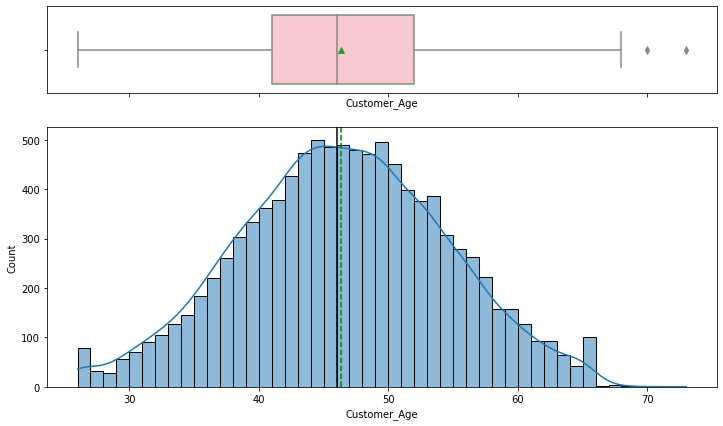

In [ ]:
histogram_boxplot(bank, 'Customer_Age')

In [ ]:
bank[bank['Customer_Age']>70]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,0,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.0,1125,3344.0,1.363,1765,34,1.615,0.252


Both the histogram and boxplot show that distribution is pretty normal. There are a few outliers, but those are realistic (e.g., the age of 73 is a realistic age) and do not distort the shape.  

###Number of Dependents###

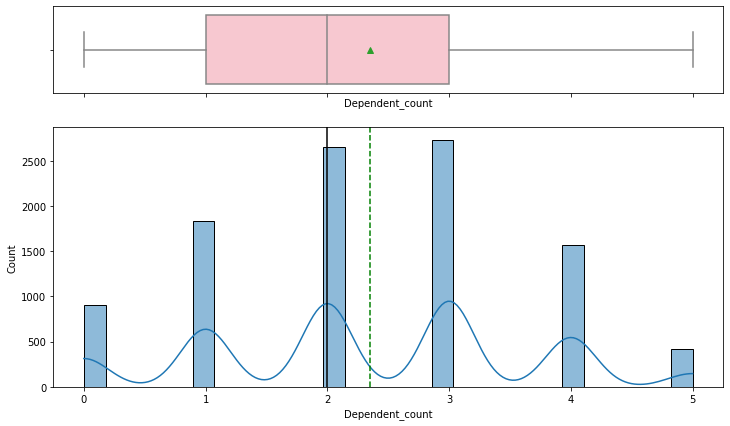

In [ ]:
histogram_boxplot(bank, 'Dependent_count')

In [ ]:
bank['Dependent_count'].skew()

-0.020825535616339912

The data on Dependent_count seems close to normal distribution, being slightly negatively skewed. There is no need for transformation. Also, the variable has no outliers. 

###Months_on_book (Period of the Relationship with the bank)

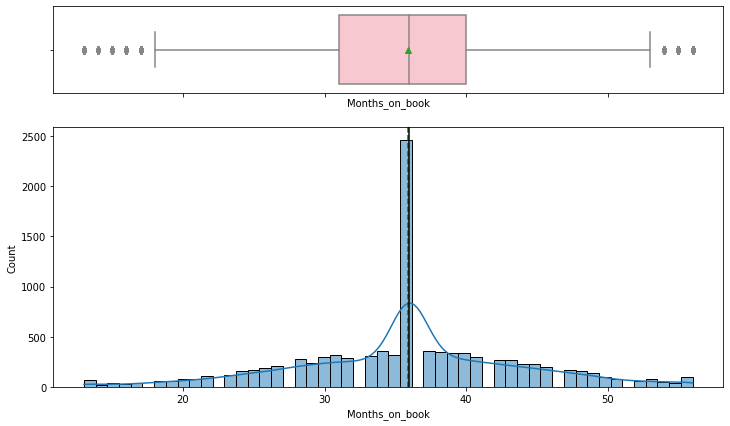

In [ ]:
histogram_boxplot(bank, 'Months_on_book')

In [ ]:
bank['Months_on_book'].skew()

-0.10656535989402989

In [ ]:
bank[(bank.Months_on_book>40) | (bank.Months_on_book<31)]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
6,0,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
11,0,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10114,0,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.000
10119,1,55,F,3,Uneducated,Single,NaN,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10121,0,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511


Nearly %50 percent of the data on Months_on_book are either above the 75th percentile or below the 25th percentile, which is a huge number. However, interestingly, the distribution is fairly symmetrical, median and mean values are very close to each other, and skewness value is very low, revealing a slightly negative skewness. When I tried to transform the data by using log and square root transformations, the skewness became worse. Also, I cannot drop the outliers, because I don't want to lose that much data. Because the outliers do not distort the shape, I will keep this variable as it is.

###Total_Relationship_Count (Total number of products held by the customer)

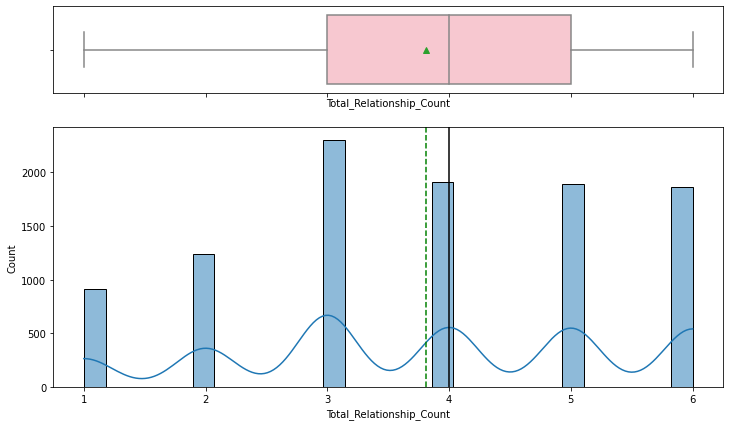

In [ ]:
histogram_boxplot(bank, 'Total_Relationship_Count')

In [ ]:
bank['Total_Relationship_Count'].skew()

-0.16245241498173682

The distribution is close to normal, mean and median values are close to each other, and just slightly negatively skewed. I will not make any changes.

###Months_Inactive_12_mon (No. of months inactive in the last 12 months)###

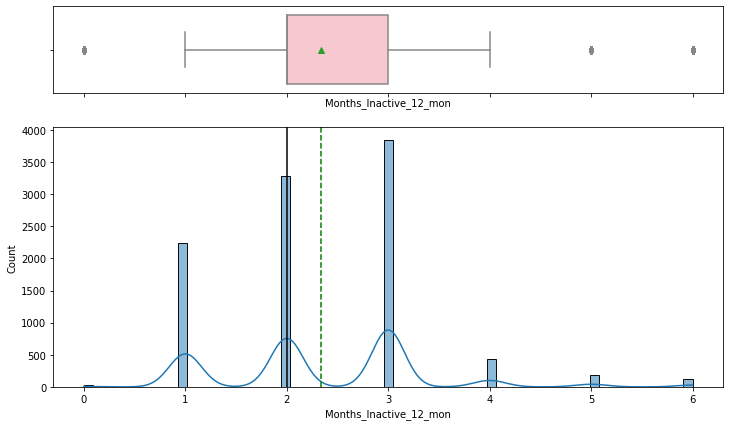

In [ ]:
histogram_boxplot(bank, 'Months_Inactive_12_mon')

In [ ]:
bank['Months_Inactive_12_mon'].skew()

0.6330611289713137

The data is moderately positively skewed. Let's check the outliers.

In [ ]:
bank.Months_Inactive_12_mon.value_counts(normalize=True)

3    0.379777
2    0.324084
1    0.220500
4    0.042954
5    0.017577
6    0.012244
0    0.002864
Name: Months_Inactive_12_mon, dtype: float64

In [ ]:
bank[(bank.Months_Inactive_12_mon>4) | (bank.Months_Inactive_12_mon<1)]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
29,0,47,M,4,High School,Married,$40K - $60K,Blue,42,6,0,0,4785.0,1362,3423.0,0.739,1045,38,0.900,0.285
31,0,53,M,2,Uneducated,Married,$60K - $80K,Blue,48,2,5,1,2451.0,1690,761.0,1.323,1596,26,1.600,0.690
108,0,62,F,1,NaN,Married,Less than $40K,Blue,56,6,0,0,1438.3,0,1438.3,0.813,1951,44,1.095,0.000
118,0,49,M,1,Doctorate,Married,$60K - $80K,Blue,36,4,6,3,24159.0,1196,22963.0,0.712,1111,24,1.000,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,0,47,M,4,NaN,Married,$60K - $80K,Blue,36,4,5,2,10585.0,1749,8836.0,0.655,18484,108,0.588,0.165
10028,0,36,F,1,Graduate,Single,Less than $40K,Blue,16,6,5,3,6091.0,1184,4907.0,0.766,17437,113,0.766,0.194
10035,0,41,F,3,Graduate,Single,Less than $40K,Blue,36,4,6,2,4133.0,1067,3066.0,0.632,16100,119,0.608,0.258
10049,0,55,M,2,Graduate,Married,Less than $40K,Gold,46,3,5,3,15987.0,0,15987.0,0.820,15853,117,0.560,0.000


There are 331 rows that are either above 4 or below 1. Before considering to drop them, I will try to transform the data, because I don't want to lose 331 rows. 

In [ ]:
bank['Months_Inactive_12_mon_log']=np.log(bank['Months_Inactive_12_mon']+1) #I added +1 because there are zeroes in the data


In [ ]:
bank['Months_Inactive_12_mon_log'].skew()

-0.27818372287498444

In [ ]:
bank['Months_Inactive_12_mon_sqrt']=np.sqrt(bank['Months_Inactive_12_mon'])
bank['Months_Inactive_12_mon_sqrt'].skew()

-0.17774493630742869

I will go with square root transformation, because it handles the data with zeroes or negative values better and has reduced skewness more compared to log transformation in this dataset. The skewness was reduced from 0.63 to 0.17. Although the direction of skewness has changed (meaning that the transformation distorted the shape of the distribution), it can be ignored as the reduction is very good.

In [ ]:
bank.drop(['Months_Inactive_12_mon','Months_Inactive_12_mon_log'], axis=1, inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Attrition_Flag               10127 non-null  int64   
 1   Customer_Age                 10127 non-null  int64   
 2   Gender                       10127 non-null  category
 3   Dependent_count              10127 non-null  int64   
 4   Education_Level              8608 non-null   category
 5   Marital_Status               9378 non-null   category
 6   Income_Category              9015 non-null   category
 7   Card_Category                10127 non-null  category
 8   Months_on_book               10127 non-null  int64   
 9   Total_Relationship_Count     10127 non-null  int64   
 10  Contacts_Count_12_mon        10127 non-null  int64   
 11  Credit_Limit                 10127 non-null  float64 
 12  Total_Revolving_Bal          10127 non-null  int64   
 13  A

As we see, a new column called Months_Inactive_12_mon_sqrt has been added, while the original column was removed from the data.

###Contacts_Count_12_mon (No. of Contacts between the customer and bank in the last 12 months)###

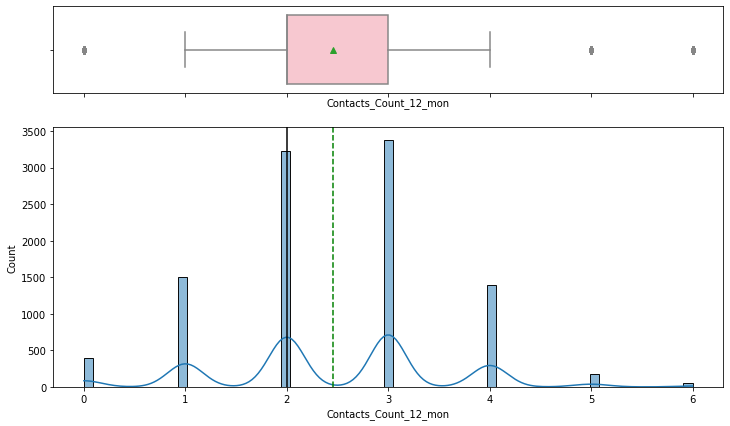

In [ ]:
histogram_boxplot(bank, 'Contacts_Count_12_mon')

In [ ]:
bank['Contacts_Count_12_mon'].skew()

0.011005626218976492

Although there are a few outliers, the distribution is almost normal and symmetrical, so I will keep this variable as it is.

###Credit_Limit###

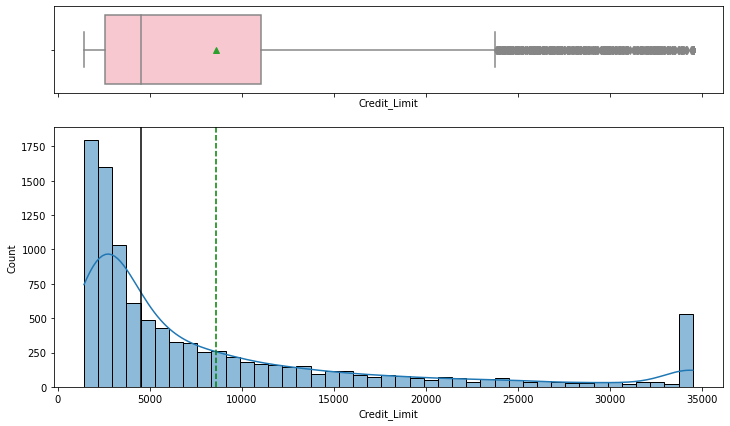

In [ ]:
histogram_boxplot(bank, 'Credit_Limit')

In [ ]:
bank['Credit_Limit'].skew()

1.666725807993647

It is highly positively skewed, and there are a lot of outliers at the right end. I cannot drop so many data points. Therefore, I will use the log transformation.

In [ ]:
bank['Credit_Limit_log']=np.log(bank['Credit_Limit'])
bank['Credit_Limit_log'].skew()

0.4570806899151332

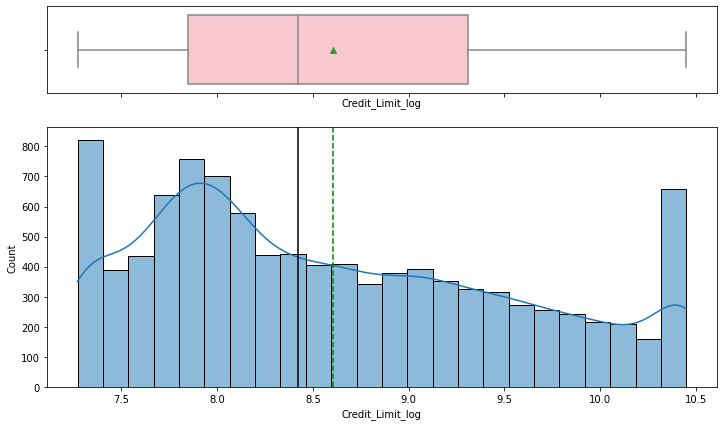

In [ ]:
histogram_boxplot(bank, 'Credit_Limit_log')

The log transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 1.66 (highly skewed) to 0.45 (slightly skewed because the values between -0.5 and 0.5 are interpreted as slightly skewed as a rule of thumb). Therefore, I will keep the log transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Credit_Limit'], axis=1, inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Attrition_Flag               10127 non-null  int64   
 1   Customer_Age                 10127 non-null  int64   
 2   Gender                       10127 non-null  category
 3   Dependent_count              10127 non-null  int64   
 4   Education_Level              8608 non-null   category
 5   Marital_Status               9378 non-null   category
 6   Income_Category              9015 non-null   category
 7   Card_Category                10127 non-null  category
 8   Months_on_book               10127 non-null  int64   
 9   Total_Relationship_Count     10127 non-null  int64   
 10  Contacts_Count_12_mon        10127 non-null  int64   
 11  Total_Revolving_Bal          10127 non-null  int64   
 12  Avg_Open_To_Buy              10127 non-null  float64 
 13  T

###Total_Revolving_Bal (The balance that carries over from one month to the next)###

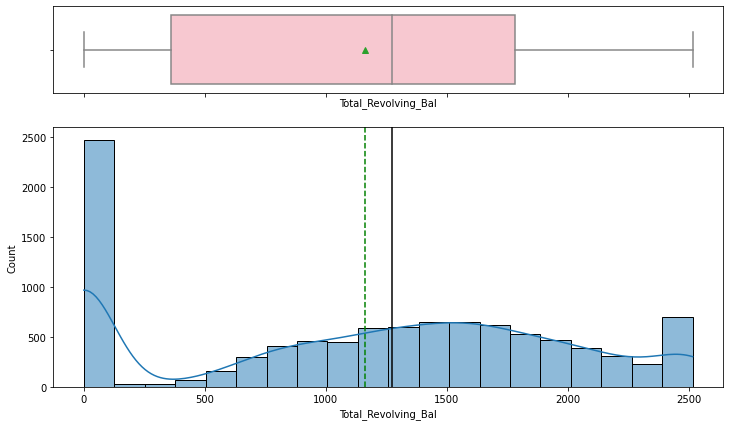

In [ ]:
histogram_boxplot(bank, 'Total_Revolving_Bal')

In [ ]:
bank['Total_Revolving_Bal'].skew()

-0.14883725028007228

Although there is an accumulation of values at the left end, they are not outliers, so the distribution is fairly normal with a slightly negative skewness. There is no need for transformation or outlier treatment. 

###Avg_Open_To_Buy (The amount left on the credit card to use - Average of last 12 months)###

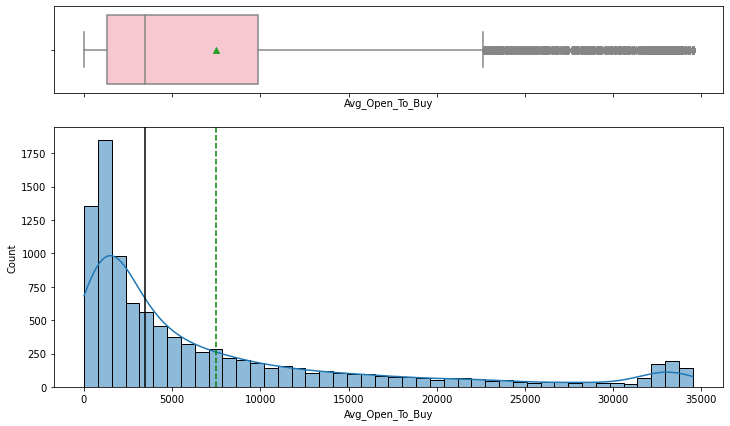

In [ ]:
histogram_boxplot(bank, 'Avg_Open_To_Buy')

In [ ]:
bank['Avg_Open_To_Buy'].skew()

1.6616965459311595

It is highly positively skewed, and there are a lot of outliers at the right end. I cannot drop so many data points. Therefore, I will use the log transformation.

In [ ]:
bank['Avg_Open_To_Buy_log']=np.log(bank['Avg_Open_To_Buy'])
bank['Avg_Open_To_Buy_log'].skew()

-0.10013152714089622

The log transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 1.66 (highly skewed) to 0.1 (very slightly skewed). Therefore, I will keep the log transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Avg_Open_To_Buy'], axis=1, inplace=True)

###Total_Amt_Chng_Q4_Q1 (Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter)###

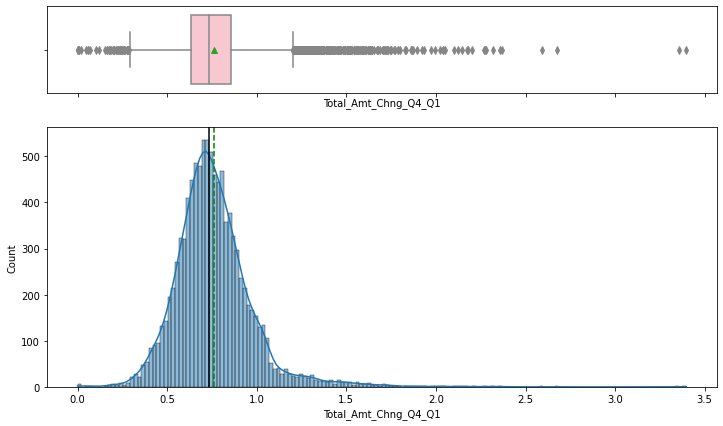

In [ ]:
histogram_boxplot(bank, 'Total_Amt_Chng_Q4_Q1')

In [ ]:
bank['Total_Amt_Chng_Q4_Q1'].skew()

1.7320634114286038

It is highly positively skewed, and there are a lot of outliers at the right end as well as left end. I cannot drop so many data points. Also, there are a lot of values of 0. Therefore, I will use the square root transformation which handles zeroes better, instead of using log transformation.

In [ ]:
bank['Total_Amt_Chng_Q4_Q1_sqrt']=np.sqrt(bank['Total_Amt_Chng_Q4_Q1'])
bank['Total_Amt_Chng_Q4_Q1_sqrt'].skew()

0.38928685171442506

The square root transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 1.73 (highly skewed) to 0.38 (slightly skewed). Therefore, I will keep the square root transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Total_Amt_Chng_Q4_Q1'], axis=1, inplace=True)

###Total_Ct_Chng_Q4_Q1 (Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter)###

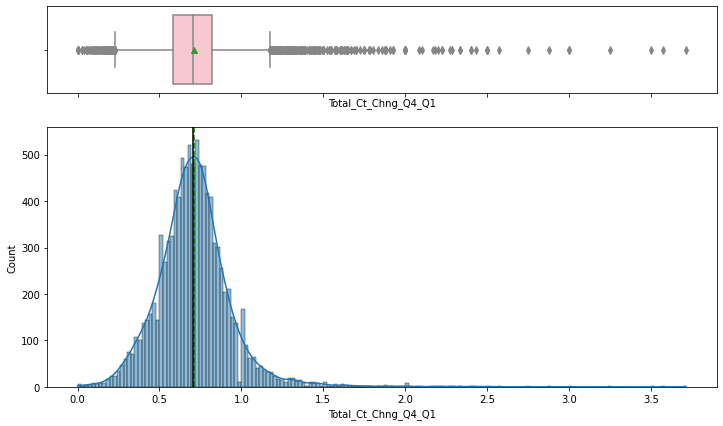

In [ ]:
histogram_boxplot(bank, 'Total_Ct_Chng_Q4_Q1')

In [ ]:
bank['Total_Ct_Chng_Q4_Q1'].skew()

2.0640305679077477

It is extremely positively skewed, and there are a lot of outliers at the right end as well as left end. I cannot drop so many data points. Also, like the variable Total_Amt_Chng_Q4_Q1, there are a lot of values of 0. Therefore, I will use the square root transformation which handles zeroes better, instead of using log transformation.

In [ ]:
bank['Total_Ct_Chng_Q4_Q1_sqrt']=np.sqrt(bank['Total_Ct_Chng_Q4_Q1'])
bank['Total_Ct_Chng_Q4_Q1_sqrt'].skew()

0.22468602138625562

The square root transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 2.06 (highly skewed) to 0.22 (slightly skewed). Therefore, I will keep the square root transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Total_Ct_Chng_Q4_Q1'], axis=1, inplace=True)

###Total_Trans_Amt (Total Transaction Amount, Last 12 months)###

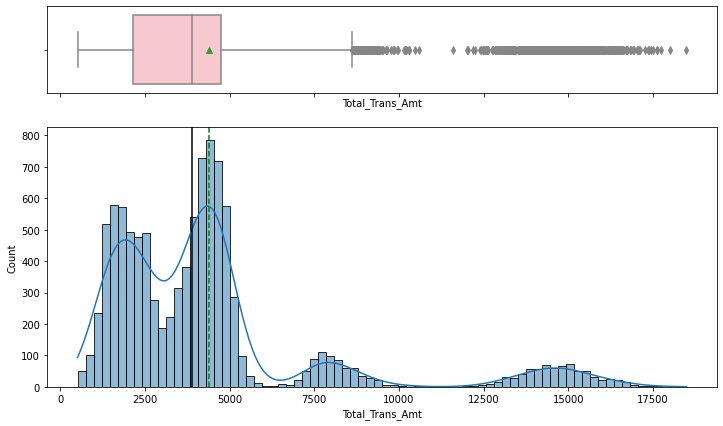

In [ ]:
histogram_boxplot(bank, 'Total_Trans_Amt')

In [ ]:
bank['Total_Trans_Amt'].skew()

2.0410034025756936

Similar to previous features, this variable is extremely positively skewed, and there are a lot of outliers at the right end. I cannot drop so many data points. On the other hand, there is not a value of zero. Therefore, I will use the log transformation.

In [ ]:
bank['Total_Trans_Amt_log']=np.log(bank['Total_Trans_Amt'])
bank['Total_Trans_Amt_log'].skew()

0.2622104617789093

The log transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 2.04 (highly skewed) to 0.26 (slightly skewed). Therefore, I will keep the log transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Total_Trans_Amt'], axis=1, inplace=True)

###Total_Trans_Ct (Total Transaction Count, Last 12 months)

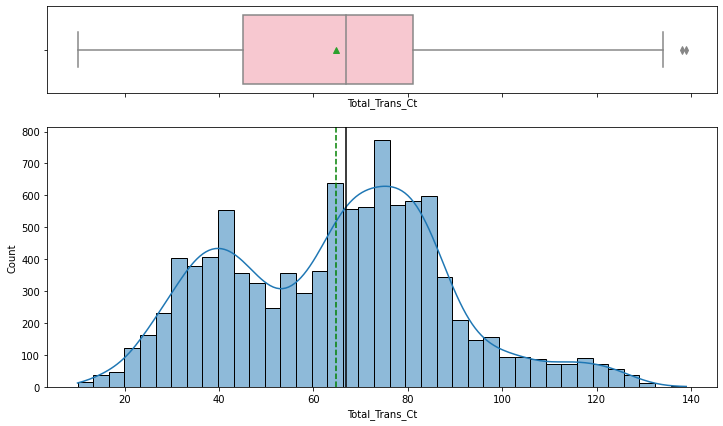

In [ ]:
histogram_boxplot(bank, 'Total_Trans_Ct')

In [ ]:
bank['Total_Trans_Ct'].skew()

0.15367306849872275

Although there are a few outliers, the distribution is almost normal and symmetrical, so I will keep this variable as it is.

###Avg_Utilization_Ratio (How much of the available credit the customer spent)###


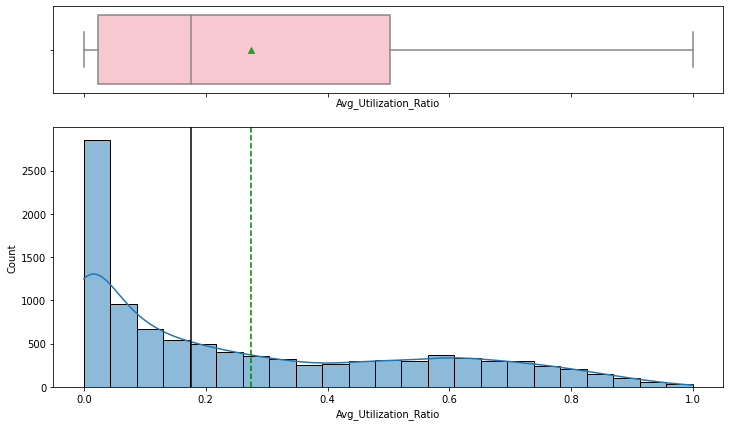

In [ ]:
histogram_boxplot(bank, 'Avg_Utilization_Ratio')

In [ ]:
bank['Avg_Utilization_Ratio'].skew()

0.7180079967731994

It is moderately positively skewed, but there is not any outlier. Because there are values of zero, I will use the square root transformation which handles zeroes better.

In [ ]:
bank['Avg_Utilization_Ratio_sqrt']=np.sqrt(bank['Avg_Utilization_Ratio'])
bank['Avg_Utilization_Ratio_sqrt'].skew()

0.0032905998165924763

The square root transformation dramatically reduced the skewness and has made the distribution closer to normal. The skewness was reduced from 0.71 (moderately skewed) to 0.003 (almost normal). Therefore, I will keep the square root transformed feature and remove the original one from the dataset.

In [ ]:
bank.drop(['Avg_Utilization_Ratio'], axis=1, inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Attrition_Flag               10127 non-null  int64   
 1   Customer_Age                 10127 non-null  int64   
 2   Gender                       10127 non-null  category
 3   Dependent_count              10127 non-null  int64   
 4   Education_Level              8608 non-null   category
 5   Marital_Status               9378 non-null   category
 6   Income_Category              9015 non-null   category
 7   Card_Category                10127 non-null  category
 8   Months_on_book               10127 non-null  int64   
 9   Total_Relationship_Count     10127 non-null  int64   
 10  Contacts_Count_12_mon        10127 non-null  int64   
 11  Total_Revolving_Bal          10127 non-null  int64   
 12  Total_Trans_Ct               10127 non-null  int64   
 13  M

###Gender###

In [ ]:
# I will create a function that will plot labeled barplot for categorical variables

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

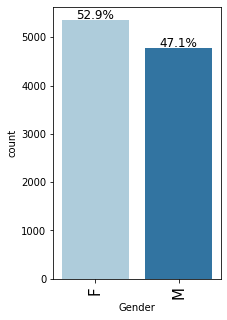

In [ ]:
labeled_barplot(bank, "Gender", perc=True)

The percentage of female customers and male customers is almost equal, meaning that the bank equally attracts customers from both genders.

###Education Level###

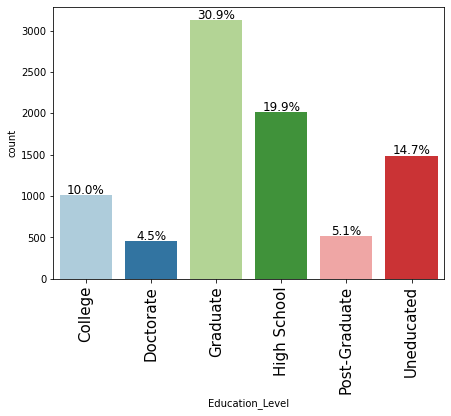

In [ ]:
labeled_barplot(bank, "Education_Level", perc=True)

Most of the customers are at graduate level or high school level. Most advanced levels such as doctorate or post graduate are fewer compared to others. I do not expect that education level will be associated with attrition, but I will explore it anyway.

###Marital Status###

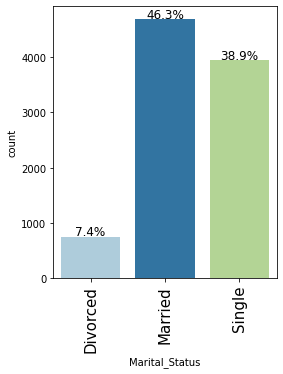

In [ ]:
labeled_barplot(bank, "Marital_Status", perc=True)

Nearly half of the customers is married, whereas divorced customers are few in numbers compared to others.

###Income Category###

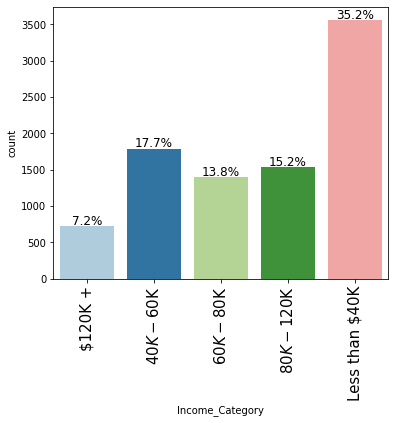

In [ ]:
labeled_barplot(bank, "Income_Category", perc=True)

Most of the customers have less than $40K or $40K - $60K income, meaning that the bank attracts customer from lower socioeconomic status.

###Card_Category###

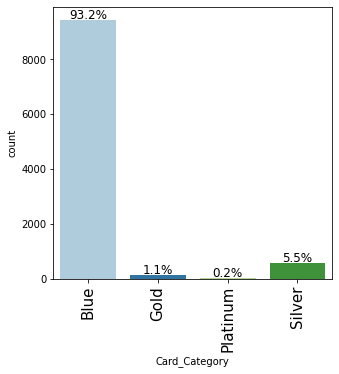

In [ ]:
labeled_barplot(bank, "Card_Category", perc=True)

The predominant card preferred by customers is the regular Blue card, which is expected as most of the customers are from lower SES that may not want the annual fee typically required by higher-tier card types such as Platinum or Gold.

###Attrition###

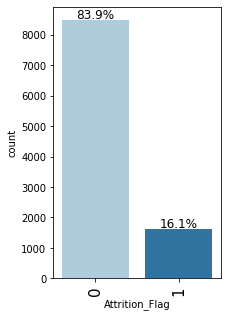

In [ ]:
labeled_barplot(bank, "Attrition_Flag", perc=True)

16.1% of the customers left their credit card services, having become attrited customers, whereas 83.9% of the customers still use the bank's services. The attrition is very imbalanced, which is a challenge that I am planning to overcome by using oversampling and undersampling techniques during model building.

##Bivariate Analysis##

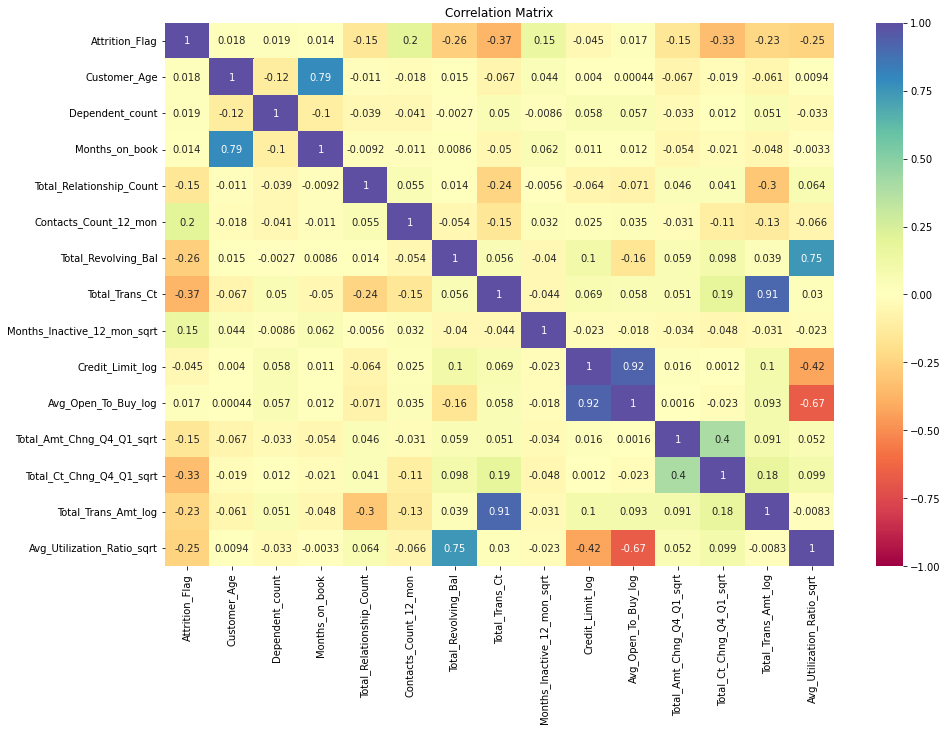

In [ ]:
# Correlation matrix and a heatmap 

plt.figure(figsize=(15,10))
sns.heatmap(bank.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

For the purposes of this analysis, I will explore the relationship of our outcome variable Attrition_Flag with other variables, where the correlation coefficient is above .20. 

Attrition_Flag has weak correlation (between 0.20 and 0.30) with Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt_log, and Avg_Utilization_Ratio_sqrt. 

Also, Attrition_Flag has weak-to-moderate correlation (between .30 and .50) with Total_Trans_Ct and Total_Ct_Chng_Q4_Q1_sqrt. 

The directions of those correlations are negative, except the one with Contacts_Count_12_mon. 

###Attrition vs. Contacts Count###

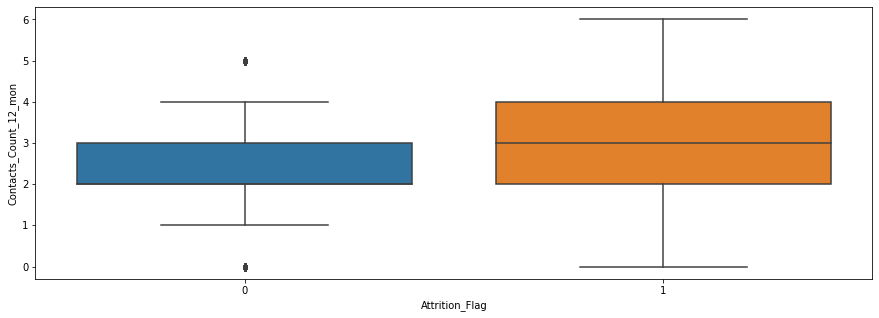

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Contacts_Count_12_mon',x='Attrition_Flag',data=bank)
plt.show()

Number of contacts between the customer and the bank was higher in the customers that left the bank eventually compared to still existing customers. We do not know the reason for contacting or who contacted first, so I do not want to make assumptions about why it was higher in the attrited customers. But it is obvious that contact has something to do with attrition. 

My note after I plotted the graphs above: More actively using a credit card has been positively associated with continuing the services with the bank. On the other hand, the number of contact was negatively associated with the chance of cotinuing the services. Therefore, I guess that there might be two reasons for the contacts: First is that the bank called the customers and tried to talk about their various offers to make them use card services more actively, but they failed to convince the customers in some way. Second, the customers called the bank and complained about the card services. Perhaps, they could not use the card for some reason or did not like the offers the bank made. 

###Attrition vs. Total Revolving Balance###

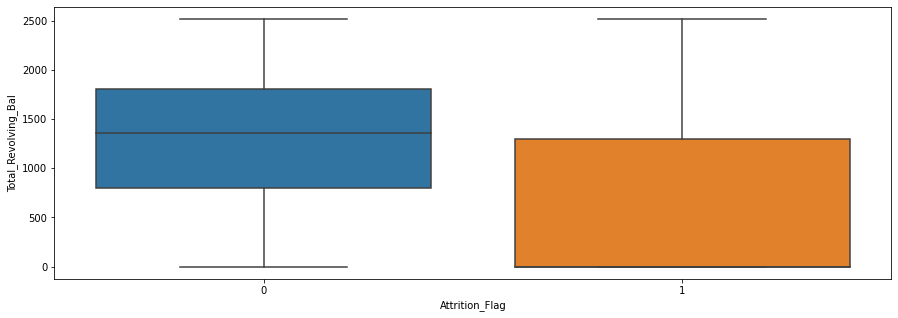

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Revolving_Bal',x='Attrition_Flag',data=bank)
plt.show()

The balance that carries over from one month to the next was lower in the attrited customers compared to existing customers. The balance that carries over from one month to the next is generally the indication of either that a customer is not able to pay his monthly balance or that there is an installment plan on a purchase. In both cases, the customer is legally bound to the bank, because it would hurt his credit score or financial credibility, if he does default on those unpaid balances. Alternatively, high total revolving balance may show that the customer uses the card actively. Those might be the reasons of why the customers with higher total revolving balance are less likely to leave the card services. 

The bank can try to increase the total revolving balance of customers by offering good installment plans (e.g., installment with zero APR or 12-month installment plan), so customers with installment plans will keep sticking with the same bank. 

###Attrition vs. Total Transaction Amount###

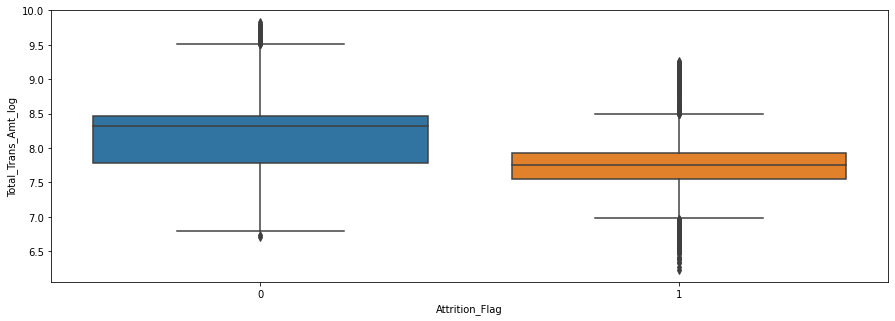

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Amt_log',x='Attrition_Flag',data=bank)
plt.show()

Customers with higher total transaction amount in last 12 months are more likely to stick with the bank compared to those with lower total transaction amount. Along with the graph about attrition vs. total revolving balance, we can see that active use of a credit card service increases the chance that a customer will keep sticking with the bank. Therefore, the bank should offer more services that would increase transactions, such as cash backs for certain purchases from popular brands, so that customers will keep using the card for transaction. 

###Attrition vs. Average Utilization Ratio###

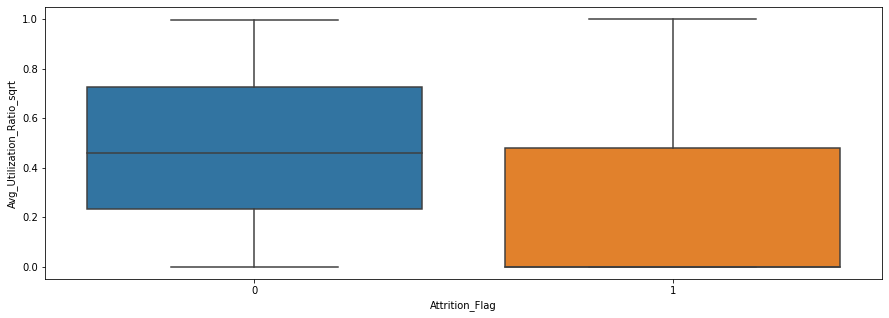

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Avg_Utilization_Ratio_sqrt',x='Attrition_Flag',data=bank)
plt.show()

The available credit the customer spent is higher in existing customers compared to attrited ones. It is not suprising considering the graph about attrition vs. total transaction amount. Both tell us how actively a customer uses the card. More frequent use means less reason to leave the credit card services. 

###Attrition vs. Total Transaction Count###

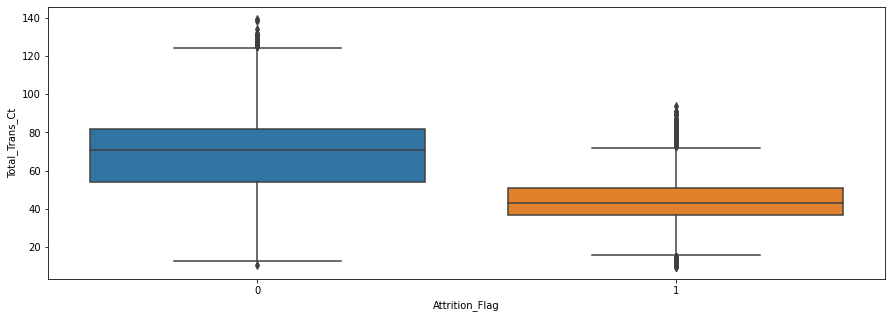

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Ct',x='Attrition_Flag',data=bank)
plt.show()

Customers with higher total transaction count in last 12 months are more likely to stick with the bank compared to those with lower total transaction count. Unsuprisingly, the graph parallels with the one about attrition vs. total transaction amount, and my interpretation would be the as the one I made for that graph. 

###Attrition vs. The Ratio of Total Transaction Count in 4th and 1st Quarters###

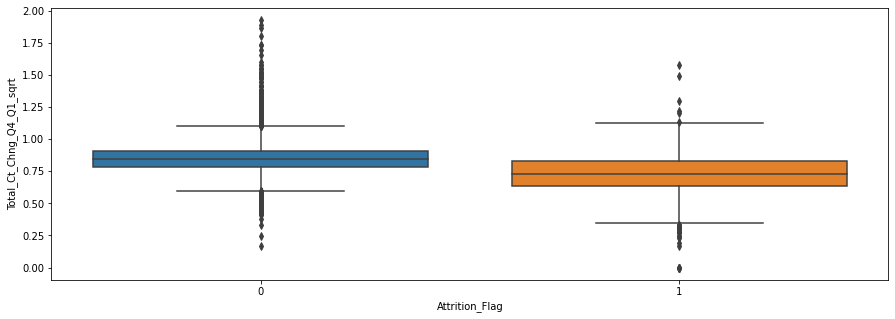

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Ct_Chng_Q4_Q1_sqrt',x='Attrition_Flag',data=bank)
plt.show()

My interpretation would be the same as those I made for the previous graphs. Total transaction count shows the active use of a card, and less use of a card means more probability to leave the services. However, it is interesting that the correlation between attrition and the ratio of total transaction AMOUNT in those two quarters was very weak (0.15), whereas the correlation between attrition and the ratio of total transaction COUNT in those two quarters was moderate (0.33). Likewise, the correlation between attrition and the ratio of total transaction COUNT in last 12 months was nearly twice as much compared to the correlation between attrition and total transaction AMOUNT. Perhaps, it is because amount is influenced by extreme values more easily, because amount has more variance (e.g., one transaction amount can be 10000 dollars, while another can be 1000 dollars), whereas count has less variance, because each transaction is equal to 1. 

###Attrition vs. Gender###

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Attrition_Flag               10127 non-null  int64   
 1   Customer_Age                 10127 non-null  int64   
 2   Gender                       10127 non-null  category
 3   Dependent_count              10127 non-null  int64   
 4   Education_Level              8608 non-null   category
 5   Marital_Status               9378 non-null   category
 6   Income_Category              9015 non-null   category
 7   Card_Category                10127 non-null  category
 8   Months_on_book               10127 non-null  int64   
 9   Total_Relationship_Count     10127 non-null  int64   
 10  Contacts_Count_12_mon        10127 non-null  int64   
 11  Total_Revolving_Bal          10127 non-null  int64   
 12  Total_Trans_Ct               10127 non-null  int64   
 13  M

In [ ]:
# The function below will create stacked barplot which will allow me to look at the relationship of Attrition with other categorical variables 


def stacked_barplot(data, predictor, target):
  
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


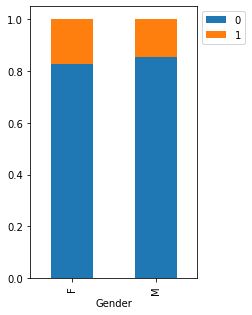

In [ ]:
stacked_barplot(bank, "Gender", "Attrition_Flag" )

There is slightly more attrition among female customers compared to male ones. However, that difference does not seem a significant one. 

###Attrition vs. Education Level###

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


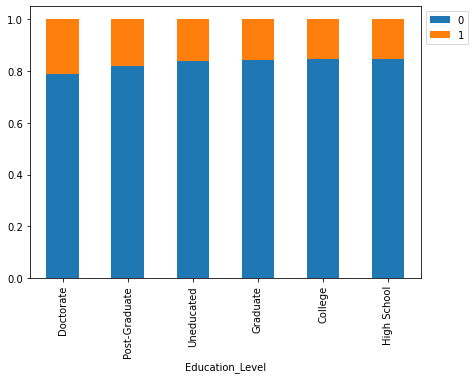

In [ ]:
stacked_barplot(bank, 'Education_Level', 'Attrition_Flag')

Although we previously found that customers with doctorate or post-graduate were significantly fewer in number compared to customers with other education levels, this graph shows that highest attrition rate was among those two groups. Therefore, we can suggest that the bank should continue to attract customers from those with graduate, college or high school degrees, or if they want to expand their customer profile, the bank should find out why people with more advanced education had higher attrition rate. Perhaps, their level of expectation from the card services, promotions or offers was higher. 

###Attrition vs. Marital Status###

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


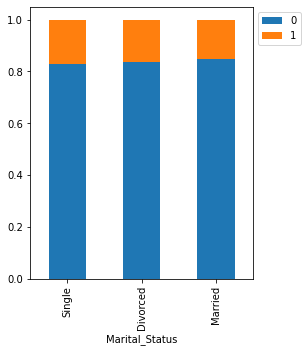

In [ ]:
stacked_barplot(bank, 'Marital_Status', 'Attrition_Flag')

It seems that the rate of attrition is slightly higher in single customers. However, it does not seem to be a significant difference. 

###Attrition vs. Income Category###

Attrition_Flag      0     1   All
Income_Category                  
All              7575  1440  9015
Less than $40K   2949   612  3561
$40K - $60K      1519   271  1790
$80K - $120K     1293   242  1535
$60K - $80K      1213   189  1402
$120K +           601   126   727
------------------------------------------------------------------------------------------------------------------------


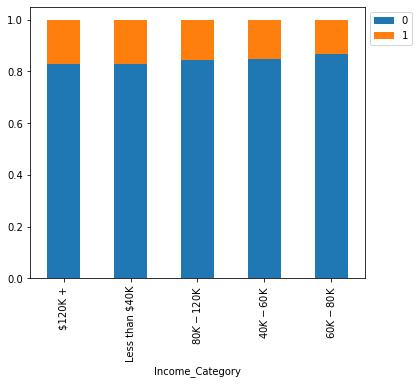

In [ ]:
stacked_barplot(bank, 'Income_Category', 'Attrition_Flag')

It is interesting to see that people from the both end of SES (i.e., those above 120K and those below 40K) had the highest attrition rate. Perhaps, it is because neither of the two groups find the card services and offers satisfactory for their own specific reasons. The bank obviously speaks to the people with middle income more. 

###Attrition vs. Card Category###

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


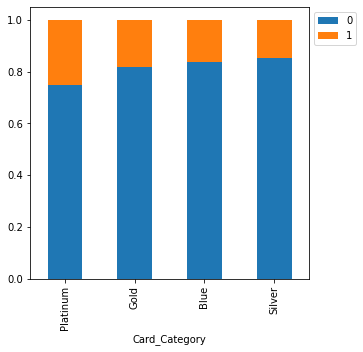

In [ ]:
stacked_barplot(bank, 'Card_Category', 'Attrition_Flag')

The highest attrition rate is among the Platinum card users and Gold card users. The bank should find out why. They may want to expand the services, offers, and promotions exclusive to Platinum card users and decrease the annual fee if it is too high. A person who has a Platinum or Gold card would have higher expectations from such cards, so the bank should find out what those expectations are and how they can be met. 

#Data Pre-Processing#

##Feature Engineering##

In [ ]:
# Let's look at the correlation matrix again to see if there are varriables with very high correlation



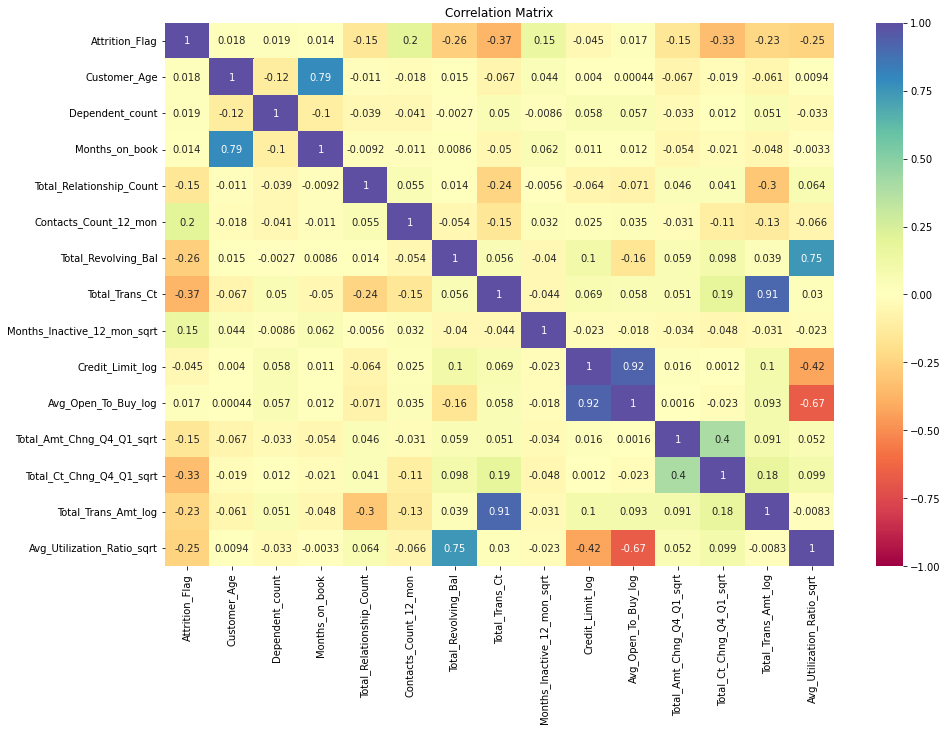

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(bank.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

We see that the following variables have very high correlation:

Avg_Open_To_Buy_log and Credit_Limit_log, 0.92

Total_Trans_Ct and Total_Trans_Amt_log, 0.91

Total_Revolving_Bal and Avg_Utilization_Ratio_sqrt, 0.75

I will check the multicollinearity of these variables through VIF scores. Although tree based models are robust to high correlation, multicollinearity will have some adverse effect on the feature importance. In case that I identify important features, multicollinearity will not give accurate features. Also, I will build regression based models as well, which are highly sensitive to multicollinerity. 

In [ ]:
# Calculating VIF for numerical variables

import statsmodels.api as sm #It imports the necessary package
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bank[list(bank[['Avg_Open_To_Buy_log','Credit_Limit_log']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,193.147565,Avg_Open_To_Buy_log
1,193.147565,Credit_Limit_log


It is a ridiculuously high VIF score. I will drop Avg_Open_To_Buy_log for two reasons. First, albeit slightly, it is less correlated with our target variable Attrition compared to Credit_Limit_log. Second, Avg_Open_To_Buy_log has a very high correlation with Avg_Utilization_Ratio_sqrt (-.67), so by removing that, I can also avoid another potential multicollinearity. 

In [ ]:
bank.drop(['Avg_Open_To_Buy_log'], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm #It imports the necessary package
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bank[list(bank[['Total_Trans_Ct','Total_Trans_Amt_log']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,13.403435,Total_Trans_Ct
1,13.403435,Total_Trans_Amt_log


Every VIF score above 10 means very high multicollinearity in an unacceptable fashion, so I need to drop one of them. I am going to drop Total_Trans_Amt_log for two reasons. First, it has a weak correlation with the target variable (0.23), whereas Total_Trans_Ct has a moderate correlation with Attrition (-0.37). Second, Total_Trans_Amt_log is a transformed feature, which is harder to interpret, whereas Total_Trans_Ct has not been transformed, because it is already normally distributed, hence more 'original'.   

In [ ]:
bank.drop(['Total_Trans_Amt_log'], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm #It imports the necessary package
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bank[list(bank[['Total_Revolving_Bal','Avg_Utilization_Ratio_sqrt']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,6.014552,Total_Revolving_Bal
1,6.014552,Avg_Utilization_Ratio_sqrt


Although a VIF score below 5 is considered as absence of multicollinearity, many sources say that a score between 5 and 10 is still acceptable. Therefore, I will not drop any of the two variables above. 

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Attrition_Flag               10127 non-null  int64   
 1   Customer_Age                 10127 non-null  int64   
 2   Gender                       10127 non-null  category
 3   Dependent_count              10127 non-null  int64   
 4   Education_Level              8608 non-null   category
 5   Marital_Status               9378 non-null   category
 6   Income_Category              9015 non-null   category
 7   Card_Category                10127 non-null  category
 8   Months_on_book               10127 non-null  int64   
 9   Total_Relationship_Count     10127 non-null  int64   
 10  Contacts_Count_12_mon        10127 non-null  int64   
 11  Total_Revolving_Bal          10127 non-null  int64   
 12  Total_Trans_Ct               10127 non-null  int64   
 13  M

##Splitting the Dataset ##

In [ ]:
X=bank.drop(columns='Attrition_Flag')
y=bank['Attrition_Flag']

In [ ]:
#I will split the dataset into train, validation, and test sets.

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# The code below will create train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)

In [ ]:
# Let's check the shape of each set

print(X_train.shape, X_val.shape, X_test.shape)

(6480, 17) (1621, 17) (2026, 17)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6480,) (1621,) (2026,)


Most of the data is in the train set, which is expected. Train set will be used to train the data, whereas validation set will be used to see the performance of the trained data. Test set will only be used to compare the performance between the trained data and the real data.

##Missing Value Treatment##

In [ ]:
si=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

#Fit and transform the train data
X_train[mode_imputed_col]=si.fit_transform(X_train[mode_imputed_col])

#Fit and transform the validation data
X_val[mode_imputed_col]=si.fit_transform(X_val[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si.transform(X_test[mode_imputed_col])

In [ ]:
# Let's check if any of the sets still have a missing value
print(X_train.isna().sum())
print('-'*30)
print(X_val.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Contacts_Count_12_mon          0
Total_Revolving_Bal            0
Total_Trans_Ct                 0
Months_Inactive_12_mon_sqrt    0
Credit_Limit_log               0
Total_Amt_Chng_Q4_Q1_sqrt      0
Total_Ct_Chng_Q4_Q1_sqrt       0
Avg_Utilization_Ratio_sqrt     0
dtype: int64
------------------------------
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Contacts_Count_12_mon          0
Total_Revolving_Bal            0
Total_Trans_Ct                 0

In [ ]:
# We should create a list of columns for which we will create dummy variables
col_dummy=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [ ]:
#Now we encode our categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_val=pd.get_dummies(X_val, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 165 to 4035
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6480 non-null   int64  
 1   Dependent_count                 6480 non-null   int64  
 2   Months_on_book                  6480 non-null   int64  
 3   Total_Relationship_Count        6480 non-null   int64  
 4   Contacts_Count_12_mon           6480 non-null   int64  
 5   Total_Revolving_Bal             6480 non-null   int64  
 6   Total_Trans_Ct                  6480 non-null   int64  
 7   Months_Inactive_12_mon_sqrt     6480 non-null   float64
 8   Credit_Limit_log                6480 non-null   float64
 9   Total_Amt_Chng_Q4_Q1_sqrt       6480 non-null   float64
 10  Total_Ct_Chng_Q4_Q1_sqrt        6480 non-null   float64
 11  Avg_Utilization_Ratio_sqrt      6480 non-null   float64
 12  Gender_M                        

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 8908 to 4967
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    1621 non-null   int64  
 1   Dependent_count                 1621 non-null   int64  
 2   Months_on_book                  1621 non-null   int64  
 3   Total_Relationship_Count        1621 non-null   int64  
 4   Contacts_Count_12_mon           1621 non-null   int64  
 5   Total_Revolving_Bal             1621 non-null   int64  
 6   Total_Trans_Ct                  1621 non-null   int64  
 7   Months_Inactive_12_mon_sqrt     1621 non-null   float64
 8   Credit_Limit_log                1621 non-null   float64
 9   Total_Amt_Chng_Q4_Q1_sqrt       1621 non-null   float64
 10  Total_Ct_Chng_Q4_Q1_sqrt        1621 non-null   float64
 11  Avg_Utilization_Ratio_sqrt      1621 non-null   float64
 12  Gender_M                       

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 9760 to 413
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Contacts_Count_12_mon           2026 non-null   int64  
 5   Total_Revolving_Bal             2026 non-null   int64  
 6   Total_Trans_Ct                  2026 non-null   int64  
 7   Months_Inactive_12_mon_sqrt     2026 non-null   float64
 8   Credit_Limit_log                2026 non-null   float64
 9   Total_Amt_Chng_Q4_Q1_sqrt       2026 non-null   float64
 10  Total_Ct_Chng_Q4_Q1_sqrt        2026 non-null   float64
 11  Avg_Utilization_Ratio_sqrt      2026 non-null   float64
 12  Gender_M                        

#Building the Model without Sampling#

##Model Evaluation Criterion##

The potential wrong predictions are the following:



1.   The model predicts that a customer will churn, while in fact, he or she does not churn: False Positive
2.   The model predicts that a customer will not churn, while in fact, he or she churns: False Negative

The first prediction results in a loss of resources (e.g., services, offers, promotions) developed with the purpose that the customer does not churn in the future. On the other hand, the second predictions results in loss of opportunity (i.e., the customer), which is against the main purpose of the bank, that is improving its services to keep the customer. 

Therefore, Recall score in model building should be maximized to reduce the rate of false negative. 



##Metric Evaluation and Confusion Matrix##

I will create two functions, one for metric (e.g., Recall, Precision) evaluation, and the other for creating the confusion matrix. 

In [ ]:
## The below function will allow us to create a confusion matrix

def con_mat(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def get_metrics(model, predictors, target):
    

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

##Logistic Regression##

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.887037  0.465898   0.733737  0.569918
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.892042  0.524904   0.728723  0.610245
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.888944  0.476923   0.738095  0.579439


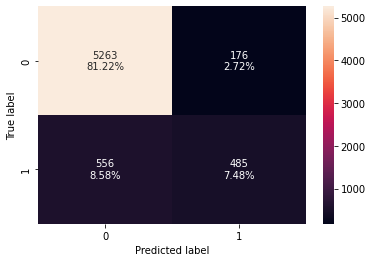

In [ ]:
#Calculating different metrics
lr_tr_perf=get_metrics(lr, X_train,y_train)
print("Training performance:\n", lr_tr_perf)
lr_val_perf=get_metrics(lr, X_val,y_val)
print("Validation performance:\n", lr_val_perf)
lr_te_perf=get_metrics(lr, X_test,y_test)
print('Testing performance:\n', lr_te_perf)
#Creating confusion matrix
con_mat(lr,X_train,y_train)

Recall scores of each set are close to each other, which can mean no overfitting or low overfitting. However, recall scores are very low, indicating a potential situation of underfitting. In other words, logistic regression model without any sampling or tuning fails to capture the real world data and results in high number of false negatives (the model predicts that customers will not churn, but they churn). 

##Decision Tree##

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0   0.89636  0.655172   0.686747  0.670588
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.886969  0.664615   0.642857  0.653555


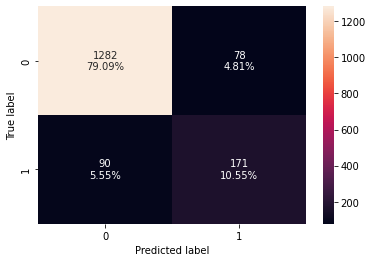

In [ ]:
#Calculating different metrics
dt_tr_perf=get_metrics(dt, X_train,y_train)
print("Training performance:\n", dt_tr_perf)
dt_val_perf=get_metrics(dt, X_val,y_val)
print("Validation performance:\n", dt_val_perf)
dt_te_perf=get_metrics(dt, X_test,y_test)
print('Testing performance:\n', dt_te_perf)
#Creating confusion matrix
con_mat(dt,X_val,y_val)

Compared to Logistic Regression, the recall scores in each set is higher, however, the scores in validation and test sets are not still high enough to say that there is no underfitting. Also, there is big gap between the recall score of train set and that of validation set, indicating a possible overfitting issue. Overall, this model is not good in terms of representing the real world data without capturing much noise. 

##Random Forest##

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.935842  0.704981   0.872038  0.779661
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.933366  0.676923       0.88  0.765217


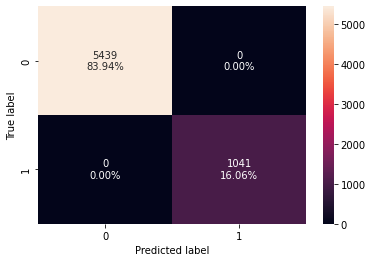

In [ ]:
#Calculating different metrics
rf_tr_perf=get_metrics(rf, X_train,y_train)
print("Training performance:\n", rf_tr_perf)
rf_val_perf=get_metrics(rf, X_val,y_val)
print("Validation performance:\n", rf_val_perf)
rf_te_perf=get_metrics(rf, X_test,y_test)
print('Testing performance:\n', rf_te_perf)
#Creating confusion matrix
con_mat(rf,X_train,y_train)

Recall scores of each set are relatively higher than those in the previous logistic regression model, which can mean lower underfitting. We cannot say there is no underfitting, because especially the recall scores in validation and testing sets are not very high. On the other hand, recall scores of validation and training sets are very different from each other indicating a potential situation of overfitting. Also, recall score of the test test is a bit low, meaning that even when we tune some hyperparameters and get validation recall score closer to testing recall score, the model will most probably fail to capture the most of the real world data, hence the underfitting issue.  

##Bagging##

In [ ]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.992284  0.957733   0.994018  0.975538
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.933991  0.697318   0.866667  0.772824
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.926456    0.68   0.830827  0.747885


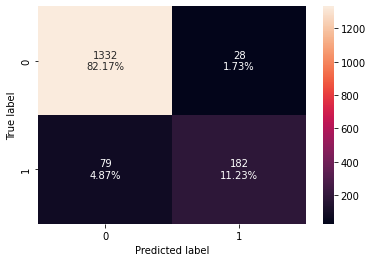

In [ ]:
#Calculating different metrics
bag_tr_perf=get_metrics(bag, X_train,y_train)
print("Training performance:\n", bag_tr_perf)
bag_val_perf=get_metrics(bag, X_val,y_val)
print("Validation performance:\n", bag_val_perf)
bag_te_perf=get_metrics(bag, X_test,y_test)
print('Testing performance:\n', bag_te_perf)
#Creating confusion matrix
con_mat(bag,X_val,y_val)

It is similar to the output of the random forest model above. Recall score in training set is high, but those in validaton and testing sets are not that high, showing a huge difference between the sets, and thus, a potential overfitting problem. Also, recall scores not being high in validation and testing sets imply the issue of underfitting as well. It can be explored further through sampling and hyperparameter tuning.

##AdaBoost##

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.928858  0.717579   0.817287  0.764194
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.931524  0.735632   0.820513  0.775758
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.929418  0.701538   0.832117  0.761269


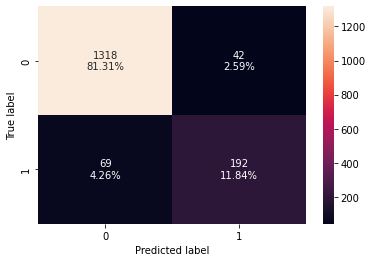

In [ ]:
#Calculating different metrics
abc_tr_perf=get_metrics(abc, X_train,y_train)
print("Training performance:\n", abc_tr_perf)
abc_val_perf=get_metrics(abc, X_val,y_val)
print("Validation performance:\n", abc_val_perf)
abc_te_perf=get_metrics(abc, X_test,y_test)
print('Testing performance:\n', abc_te_perf)
#Creating confusion matrix
con_mat(abc,X_val,y_val)

Recall scores of each set are very close to each other, incidation very low or no overfitting. However, recall scores could be a bit higher, so we could say that there is no underfitting as well. But it can be explored further, if the performances of next models are not better than this one. 

##XGBoosting##

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.941512  0.723343    0.89218  0.798939
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.939543  0.727969   0.875576  0.794979
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.938796  0.704615   0.891051  0.786942


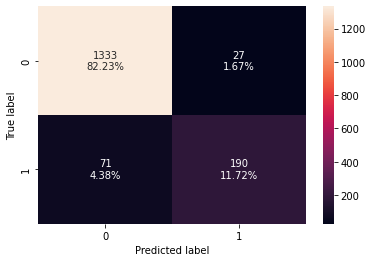

In [ ]:
#Calculating different metrics
xgb_tr_perf=get_metrics(xgb, X_train,y_train)
print("Training performance:\n", xgb_tr_perf)
xgb_val_perf=get_metrics(xgb, X_val,y_val)
print("Validation performance:\n", xgb_val_perf)
xgb_te_perf=get_metrics(xgb, X_test,y_test)
print('Testing performance:\n', xgb_te_perf)
#Creating confusion matrix
con_mat(xgb,X_val,y_val)

It is very similar to Adaboosting in terms of recall scores, so I will not interpret this one. 

#Building the Model with Oversampling#

##Oversampling with SMOTE##

In [ ]:
# I will fit SMOTE on train data to oversample it
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
#Let's check the number of 1s and 0s before oversampling and after oversampling to be sure that oversampling worked.

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1041
Before OverSampling, count of label '0': 5439 

After OverSampling, count of label '1': 5439
After OverSampling, count of label '0': 5439 

After OverSampling, the shape of train_X: (10878, 27)
After OverSampling, the shape of train_y: (10878,) 



As we see, the number of 1s and 0s became equal after oversampling, and the shape of X and Y got nearly doubled. The new data has been synthetically created by Python.

##Logistic Regression on Oversampled Data##

In [ ]:
lr_over = LogisticRegression(random_state=1)

lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.87323  0.874242   0.872477  0.873358
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.847008  0.731801   0.517615  0.606349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.836624  0.704615   0.493534  0.580482


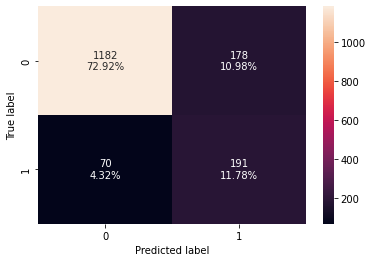

In [ ]:
#Calculating different metrics
lr_over_tr_perf=get_metrics(lr_over, X_train_over,y_train_over)
print("Training performance:\n", lr_over_tr_perf)
lr_over_val_perf=get_metrics(lr_over, X_val,y_val)
print("Validation performance:\n", lr_over_val_perf)
lr_over_te_perf=get_metrics(lr_over, X_test,y_test)
print('Testing performance:\n', lr_over_te_perf)
#Creating confusion matrix
con_mat(lr_over,X_val,y_val)

The logistic regression model with oversampled data has as nearly twice as higher recall score compared to the same model without any sampling. Therefore, this model can be explored further through tuning.

##Decision Tree on Oversampled Data

In [ ]:
dt_ov = DecisionTreeClassifier(random_state=1)

dt_ov.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.874152  0.701149   0.592233  0.642105
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.886476    0.72   0.627346  0.670487


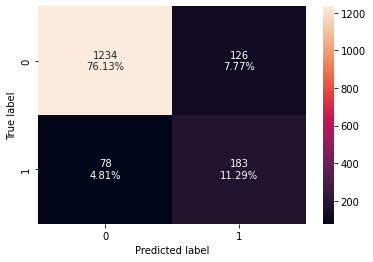

In [ ]:
#Calculating different metrics
dt_ov_tr_perf=get_metrics(dt_ov, X_train_over,y_train_over)
print("Training performance:\n", dt_ov_tr_perf)
dt_ov_val_perf=get_metrics(dt_ov, X_val,y_val)
print("Validation performance:\n", dt_ov_val_perf)
dt_ov_te_perf=get_metrics(dt_ov, X_test,y_test)
print('Testing performance:\n', dt_ov_te_perf)
#Creating confusion matrix
con_mat(dt_ov,X_val,y_val)

Compared to the previous decision tree without any sampling, the recall scores of validation and test sets increased from 0.65 and 0.66 to 0.70 and 0.72, which means less underfitting (better representing the real world); however, those scores are not still high enough to say that there is no underfitting. Also, recall score of train set still greatly differs from that of validation set, showing that overfitting issue (capturing too much noise) persists. 

##Random Forest on Oversampled Data##

In [ ]:
rf_ov = RandomForestClassifier(random_state=1)

rf_ov.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.930907  0.747126   0.809129  0.776892
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.931885  0.747692   0.812709  0.778846


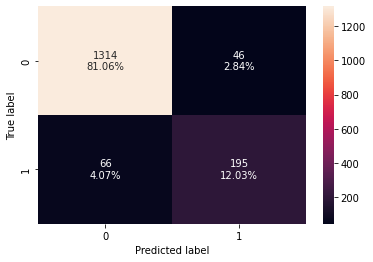

In [ ]:
#Calculating different metrics
rf_ov_tr_perf=get_metrics(rf_ov, X_train_over,y_train_over)
print("Training performance:\n", rf_ov_tr_perf)
rf_ov_val_perf=get_metrics(rf_ov, X_val,y_val)
print("Validation performance:\n", rf_ov_val_perf)
rf_ov_te_perf=get_metrics(rf_ov, X_test,y_test)
print('Testing performance:\n', rf_ov_te_perf)
#Creating confusion matrix
con_mat(rf_ov,X_val,y_val)

Compared to the Random Forest model without sampling, the recall score in this one got increased only slightly in validation and test sets. However, the difference between the recall scores of training set and validation set is still a lot.

##Bagging on Oversampled Data##

In [ ]:
bag_ov = BaggingClassifier(random_state=1)

bag_ov.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.99715  0.996323   0.997974  0.997148
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.918569  0.731801   0.754941  0.743191
Testing performance:
    Accuracy    Recall  Precision       F1
0   0.92152  0.750769   0.757764  0.75425


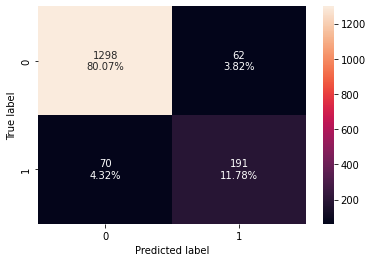

In [ ]:
#Calculating different metrics
bag_ov_tr_perf=get_metrics(bag_ov, X_train_over,y_train_over)
print("Training performance:\n", bag_ov_tr_perf)
bag_ov_val_perf=get_metrics(bag_ov, X_val,y_val)
print("Validation performance:\n", bag_ov_val_perf)
bag_ov_te_perf=get_metrics(bag_ov, X_test,y_test)
print('Testing performance:\n', bag_ov_te_perf)
#Creating confusion matrix
con_mat(bag_ov,X_val,y_val)

Compared to the bagging model without sampling, the recall scores of validation and testing sets increased, but the difference between the recall score of validation set and training set is still big, indicating a potential overfitting issue. Also, recall scores are still below 0.8, which implies a potential underfitting issue.

##AdaBoost on Oversampled Data##

In [ ]:
abc_ov = AdaBoostClassifier(random_state=1)
abc_ov.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.938592  0.942085   0.935549  0.938805
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.916101  0.789272    0.71777  0.751825
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.912142  0.803077      0.696  0.745714


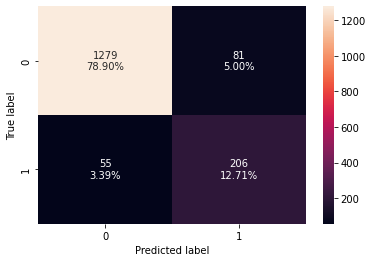

In [ ]:
#Calculating different metrics
abc_ov_tr_perf=get_metrics(abc_ov, X_train_over,y_train_over)
print("Training performance:\n", abc_ov_tr_perf)
abc_ov_val_perf=get_metrics(abc_ov, X_val,y_val)
print("Validation performance:\n", abc_ov_val_perf)
abc_ov_te_perf=get_metrics(abc_ov, X_test,y_test)
print('Testing performance:\n', abc_ov_te_perf)
#Creating confusion matrix
con_mat(abc_ov,X_val,y_val)

Overall recall scores of each set increased compared to adaboost without oversampling. With some hyperparameter tuning, it can improve much, recall scores getting higher and close to each other, so we can safely say that the rate of false negatives got reduced and the model represents the real world data without capturing too much noise.

##XGBoosting on Oversampled Data##

In [ ]:
xgb_ov = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_ov.fit(X_train_over, y_train_over)

XGBClassifier(eval_metric='logloss', random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.959368  0.95569   0.962771  0.959218
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.932141  0.800766   0.782772  0.791667
Testing performance:
    Accuracy  Recall  Precision        F1
0   0.93386     0.8   0.790274  0.795107


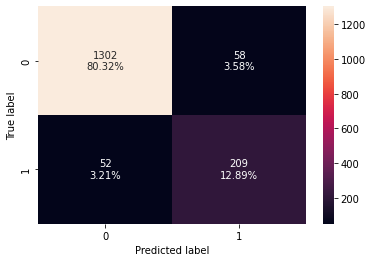

In [ ]:
#Calculating different metrics
xgb_ov_tr_perf=get_metrics(xgb_ov, X_train_over,y_train_over)
print("Training performance:\n", xgb_ov_tr_perf)
xgb_ov_val_perf=get_metrics(xgb_ov, X_val,y_val)
print("Validation performance:\n", xgb_ov_val_perf)
xgb_ov_te_perf=get_metrics(xgb_ov, X_test,y_test)
print('Testing performance:\n', xgb_ov_te_perf)
#Creating confusion matrix
con_mat(xgb_ov,X_val,y_val)

Compared to the previous XGboosting model with no oversampling, recall scores of validation and test sets increased, meaning less underfitting, but it captured more noise, because recall score of the training set is much higher than that of the validation set. 

#Building the Model with Undersampling#

##Undersampling with Random Undersampler##

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 1041
Before Under Sampling, count of label '0': 5439 

After Under Sampling, count of label '1': 1041
After Under Sampling, count of label '0': 1041 

After Under Sampling, the shape of train_X: (2082, 27)
After Under Sampling, the shape of train_y: (2082,) 



As opposed to oversampling which synthetically creates new data, undersampling equalized the counts of 1 and 0 by removing some amount of data from 0. The obvious disadvantage is the loss of data. 

##Logistic Regression on Undersampled Data##

In [ ]:
lr_un = LogisticRegression(random_state=1)

lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.801153  0.814601   0.793265  0.803791
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.804442  0.835249   0.443089  0.579017
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.795163  0.812308   0.427184  0.559915


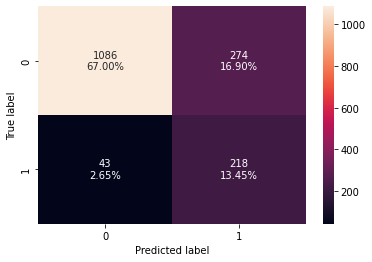

In [ ]:
#Calculating different metrics
lr_un_tr_perf=get_metrics(lr_un, X_train_un,y_train_un)
print("Training performance:\n", lr_un_tr_perf)
lr_un_val_perf=get_metrics(lr_un, X_val,y_val)
print("Validation performance:\n", lr_un_val_perf)
lr_un_te_perf=get_metrics(lr_un, X_test,y_test)
print('Testing performance:\n', lr_un_te_perf)
#Creating confusion matrix
con_mat(lr_un,X_val,y_val)

This is obviously a better model compared to logistic regression with no sampling or logistic regression on oversampled data. Recall scores are higher and above 0.8, and more importantly, they are close to each other, meaning that the model is more likely to represent the real world data without capturing too much noise and reduced rate of false negatives. 

##Decision Tree on Undersampled Data##

In [ ]:
dt_un = DecisionTreeClassifier(random_state=1)

dt_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.826033  0.854406   0.477516  0.612637
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.84156  0.836923   0.503704  0.628902


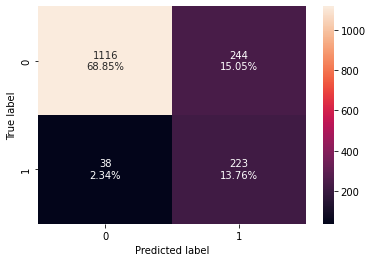

In [ ]:
#Calculating different metrics
dt_un_tr_perf=get_metrics(dt_un, X_train_un,y_train_un)
print("Training performance:\n", dt_un_tr_perf)
dt_un_val_perf=get_metrics(dt_un, X_val,y_val)
print("Validation performance:\n", dt_un_val_perf)
dt_un_te_perf=get_metrics(dt_un, X_test,y_test)
print('Testing performance:\n', dt_un_te_perf)
#Creating confusion matrix
con_mat(dt_un,X_val,y_val)

Compared to the previous two decision models, one with no sampling, the other on oversampled data, this model has higher recall scores in validation and test sets. The fact that those scores are above 0.8 shows the possibility of very few underfitting. However, the overfitting issue still might be a problem, because of the 0.15 gap between the recall score of train set and that of validation set. Smaller the gap is, less chance of overfitting problem there would be. The random forest model below does a better job than this model. 

##Random Forest on Undersampled Data##

In [ ]:
rf_un = RandomForestClassifier(random_state=1)

rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy   Recall  Precision        F1
0   0.90438  0.89272   0.647222  0.750403
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.904245  0.907692   0.642702  0.752551


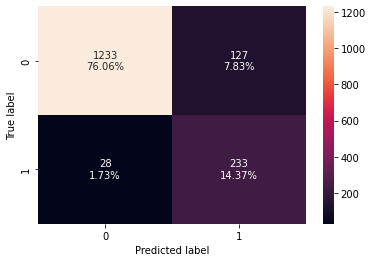

In [ ]:
#Calculating different metrics
rf_un_tr_perf=get_metrics(rf_un, X_train_un,y_train_un)
print("Training performance:\n", rf_un_tr_perf)
rf_un_val_perf=get_metrics(rf_un, X_val,y_val)
print("Validation performance:\n", rf_un_val_perf)
rf_un_te_perf=get_metrics(rf_un, X_test,y_test)
print('Testing performance:\n', rf_un_te_perf)
#Creating confusion matrix
con_mat(rf_un,X_val,y_val)

This model is significantly better than the previous random forest models in this analysis. Recall scores of validation and test sets have dramatically become higher, indicating a no sign of underfitting. However, there is still some difference between the recall score of training set and that of validation set, indication a potential issue of overfitting, which can be explored further and possibly reduced through hyperparameter tuning. 

##Bagging on Undersampled Data##

In [ ]:
bag_un = BaggingClassifier(random_state=1)

bag_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.993276  0.987512   0.999028  0.993237
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.895743  0.850575   0.630682  0.724307
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.902764  0.867692   0.646789  0.74113


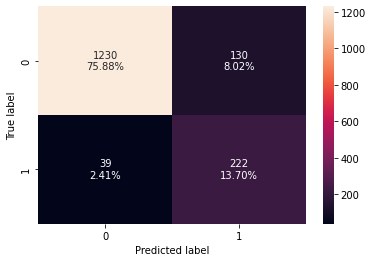

In [ ]:
#Calculating different metrics
bag_un_tr_perf=get_metrics(bag_un, X_train_un,y_train_un)
print("Training performance:\n", bag_un_tr_perf)
bag_un_val_perf=get_metrics(bag_un, X_val,y_val)
print("Validation performance:\n", bag_un_val_perf)
bag_un_te_perf=get_metrics(bag_un, X_test,y_test)
print('Testing performance:\n', bag_un_te_perf)
#Creating confusion matrix
con_mat(bag_un,X_val,y_val)

Compared to the previous bagging models in this analysis, this model increased the recall scores of the validation and test sets dramatically, while reducing the gap between the recall score of training set and that of validation set, indicating lower chance of underfitting. However, there is still some extent of gap (0.98 vs. 0.85), which can possibly be reduced through tuning ( we will see).

##AdaBoosting on Undersampled Data##

In [ ]:
abc_un = AdaBoostClassifier(random_state=1)

abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.887608  0.891451   0.884652  0.888038
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.872301  0.896552   0.565217  0.693333
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.884008  0.910769   0.589641  0.71584


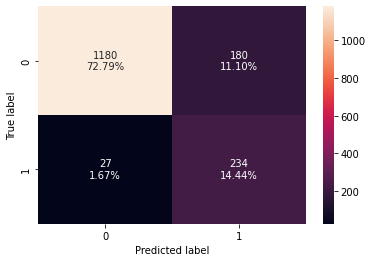

In [ ]:
#Calculating different metrics
abc_un_tr_perf=get_metrics(abc_un, X_train_un,y_train_un)
print("Training performance:\n", abc_un_tr_perf)
abc_un_val_perf=get_metrics(abc_un, X_val,y_val)
print("Validation performance:\n", abc_un_val_perf)
abc_un_te_perf=get_metrics(abc_un, X_test,y_test)
print('Testing performance:\n', abc_un_te_perf)
#Creating confusion matrix
con_mat(abc_un,X_val,y_val)

This is a very good model. I am not sure it even needs hyperparameter tuning. The recall scores are high in each set (nearly 0.9 in train and validation sets, above 0.9 in test set), meaning that the model represents the real world data well. Also, the recall scores of each set are very close to each other, meaning that the model captures the real world without capturing much noise. I will see that if it becomes even better with some hyperparameter tuning. 

##XGBoosting on Undersampled Data##

In [ ]:
xgb_un = XGBClassifier(random_state=1, eval_metric='logloss')

xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(eval_metric='logloss', random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.928434  0.933718   0.923954  0.92881
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.906848  0.900383   0.652778  0.756844
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.904245  0.935385   0.637317  0.758105


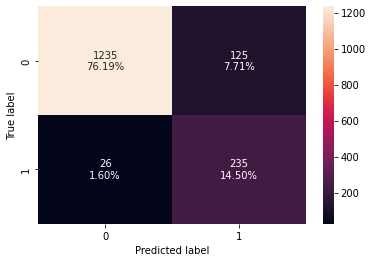

In [ ]:
#Calculating different metrics
xgb_un_tr_perf=get_metrics(xgb_un, X_train_un,y_train_un)
print("Training performance:\n", xgb_un_tr_perf)
xgb_un_val_perf=get_metrics(xgb_un, X_val,y_val)
print("Validation performance:\n", xgb_un_val_perf)
xgb_un_te_perf=get_metrics(xgb_un, X_test,y_test)
print('Testing performance:\n', xgb_un_te_perf)
#Creating confusion matrix
con_mat(xgb_un,X_val,y_val)

Compared to the previous Adaboost model, the recall scores in each set is slightly higher. On the other hand, the difference between the recall score of train set and that of validation set is bit higher compared to the difference in the Adaboost model, incidating a slightly higher chance of overfitting (capturing too much noise).

#Comparing the Performances of 18 Models#

##Comparing the Training Sets##

In [ ]:
models_train_comp_df = pd.concat(
    [lr_tr_perf.T, lr_over_tr_perf.T, lr_un_tr_perf.T, dt_tr_perf.T, dt_ov_tr_perf.T, dt_un_tr_perf.T, rf_tr_perf.T, rf_ov_tr_perf.T, rf_un_tr_perf.T, bag_tr_perf.T, bag_ov_tr_perf.T, bag_un_tr_perf.T, 
     abc_tr_perf.T, abc_ov_tr_perf.T, abc_un_tr_perf.T, xgb_tr_perf.T, xgb_ov_tr_perf.T, xgb_un_tr_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversampled",
    "Logistic Regression Undersampled",
    "Decision Tree Classifier",
    "Decision Tree Oversampled",
    "Decision Tree Undersampled",
    "Random Forest Classifier",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Bagging Classifier",
    "Bagging Oversampled",
    "Bagging Undersampled",
    "Adaboost Classifier",
    "Adaboost Oversampled",
    "Adaboost Undersampled",
     "XGBoost Classifier",
    "XGBoost Oversampled",
    "XGBoost Undersampled"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression Oversampled,Logistic Regression Undersampled,Decision Tree Classifier,Decision Tree Oversampled,Decision Tree Undersampled,Random Forest Classifier,Random Forest Oversampled,Random Forest Undersampled,Bagging Classifier,Bagging Oversampled,Bagging Undersampled,Adaboost Classifier,Adaboost Oversampled,Adaboost Undersampled,XGBoost Classifier,XGBoost Oversampled,XGBoost Undersampled
Accuracy,0.887037,0.873230,0.801153,1.0,1.0,1.0,1.0,1.0,1.0,0.992284,0.997150,0.993276,0.928858,0.938592,0.887608,0.941512,0.959368,0.928434
Recall,0.465898,0.874242,0.814601,1.0,1.0,1.0,1.0,1.0,1.0,0.957733,0.996323,0.987512,0.717579,0.942085,0.891451,0.723343,0.955690,0.933718
Precision,0.733737,0.872477,0.793265,1.0,1.0,1.0,1.0,1.0,1.0,0.994018,0.997974,0.999028,0.817287,0.935549,0.884652,0.892180,0.962771,0.923954
F1,0.569918,0.873358,0.803791,1.0,1.0,1.0,1.0,1.0,1.0,0.975538,0.997148,0.993237,0.764194,0.938805,0.888038,0.798939,0.959218,0.928810


##Comparing the Validation Sets##

In [ ]:
models_val_comp_df = pd.concat(
    [lr_val_perf.T, lr_over_val_perf.T, lr_un_val_perf.T, dt_val_perf.T, dt_ov_val_perf.T, dt_un_val_perf.T, rf_val_perf.T, rf_ov_val_perf.T, rf_un_val_perf.T, bag_val_perf.T, bag_ov_val_perf.T, bag_un_val_perf.T, 
     abc_val_perf.T, abc_ov_val_perf.T, abc_un_val_perf.T, xgb_val_perf.T, xgb_ov_val_perf.T, xgb_un_val_perf.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversampled",
    "Logistic Regression Undersampled",
    "Decision Tree Classifier",
    "Decision Tree Oversampled",
    "Decision Tree Undersampled",
    "Random Forest Classifier",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Bagging Classifier",
    "Bagging Oversampled",
    "Bagging Undersampled",
    "Adaboost Classifier",
    "Adaboost Oversampled",
    "Adaboost Undersampled",
     "XGBoost Classifier",
    "XGBoost Oversampled",
    "XGBoost Undersampled"]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression Oversampled,Logistic Regression Undersampled,Decision Tree Classifier,Decision Tree Oversampled,Decision Tree Undersampled,Random Forest Classifier,Random Forest Oversampled,Random Forest Undersampled,Bagging Classifier,Bagging Oversampled,Bagging Undersampled,Adaboost Classifier,Adaboost Oversampled,Adaboost Undersampled,XGBoost Classifier,XGBoost Oversampled,XGBoost Undersampled
Accuracy,0.892042,0.847008,0.804442,0.896360,0.874152,0.826033,0.935842,0.930907,0.904380,0.933991,0.918569,0.895743,0.931524,0.916101,0.872301,0.939543,0.932141,0.906848
Recall,0.524904,0.731801,0.835249,0.655172,0.701149,0.854406,0.704981,0.747126,0.892720,0.697318,0.731801,0.850575,0.735632,0.789272,0.896552,0.727969,0.800766,0.900383
Precision,0.728723,0.517615,0.443089,0.686747,0.592233,0.477516,0.872038,0.809129,0.647222,0.866667,0.754941,0.630682,0.820513,0.717770,0.565217,0.875576,0.782772,0.652778
F1,0.610245,0.606349,0.579017,0.670588,0.642105,0.612637,0.779661,0.776892,0.750403,0.772824,0.743191,0.724307,0.775758,0.751825,0.693333,0.794979,0.791667,0.756844


##Comparing the Testing Sets##

In [ ]:
models_te_comp_df = pd.concat(
    [lr_te_perf.T, lr_over_te_perf.T, lr_un_te_perf.T, dt_te_perf.T, dt_ov_te_perf.T, dt_un_te_perf.T, rf_te_perf.T, rf_ov_te_perf.T, rf_un_te_perf.T, bag_te_perf.T, bag_ov_te_perf.T, bag_un_te_perf.T, 
     abc_te_perf.T, abc_ov_te_perf.T, abc_un_te_perf.T, xgb_te_perf.T, xgb_ov_te_perf.T, xgb_un_te_perf.T],
    axis=1,
)
models_te_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversampled",
    "Logistic Regression Undersampled",
    "Decision Tree Classifier",
    "Decision Tree Oversampled",
    "Decision Tree Undersampled",
    "Random Forest Classifier",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Bagging Classifier",
    "Bagging Oversampled",
    "Bagging Undersampled",
    "Adaboost Classifier",
    "Adaboost Oversampled",
    "Adaboost Undersampled",
    "XGBoost Classifier",
    "XGBoost Oversampled",
    "XGBoost Undersampled"]
print("Testing performance comparison:")
models_te_comp_df

Testing performance comparison:


,Logistic Regression,Logistic Regression Oversampled,Logistic Regression Undersampled,Decision Tree Classifier,Decision Tree Oversampled,Decision Tree Undersampled,Random Forest Classifier,Random Forest Oversampled,Random Forest Undersampled,Bagging Classifier,Bagging Oversampled,Bagging Undersampled,Adaboost Classifier,Adaboost Oversampled,Adaboost Undersampled,XGBoost Classifier,XGBoost Oversampled,XGBoost Undersampled
Accuracy,0.888944,0.836624,0.795163,0.886969,0.886476,0.841560,0.933366,0.931885,0.904245,0.926456,0.921520,0.902764,0.929418,0.912142,0.884008,0.938796,0.933860,0.904245
Recall,0.476923,0.704615,0.812308,0.664615,0.720000,0.836923,0.676923,0.747692,0.907692,0.680000,0.750769,0.867692,0.701538,0.803077,0.910769,0.704615,0.800000,0.935385
Precision,0.738095,0.493534,0.427184,0.642857,0.627346,0.503704,0.880000,0.812709,0.642702,0.830827,0.757764,0.646789,0.832117,0.696000,0.589641,0.891051,0.790274,0.637317
F1,0.579439,0.580482,0.559915,0.653555,0.670487,0.628902,0.765217,0.778846,0.752551,0.747885,0.754250,0.741130,0.761269,0.745714,0.715840,0.786942,0.795107,0.758105


##Decision to Choose 3 Models out of 18##

The first model I am going to choose for tuning is the AdaBoost on Undersampled Data model. As I wrote above, this is a very good model, having very high recall scores in each set (nearly 0.9 in train and validation sets, above 0.9 in test set), meaning that the model represents the real world data well (avoiding underfitting). Also, the recall scores of each set are very close to each other, meaning that the model captures the real world without capturing much noise (avoiding overfitting). Therefore, the rate of false negatives is very low. It can be even better with some hyperparameter tuning. 

The second model I am going to choose for tuning is the XGBoost on Undersampled Data model. Although it is very similar to the Gradient Boosting on Undersampled Data model in terms of recall scores in each set (Although I checked the performance of the Gradient Boosting, I did not add it into this project, because of the '6 model limit') , the XGBoost model did a slightly better job with reducing overfitting, because the difference of recall scores between the train and validation sets is nearly 0.4 in the Gradient Boosting model, whereas it is nearly 0.3 in the XGBoost model. Therefore, I will go with XGBoost.

The third model I am going to choose for tuning is the Random Forest on Undersampled Data model. Although the difference between the recall scores of validation and train sets is a bit high (1 in train set vs. 0.89 in validation set), the difference between validation and test sets is very low (0.90 in test set vs. 0.89 in validation set). If I can reduce the recall score of train set with hyperparameter tuning, it can perform very well in terms of representing the real world data without capturing noise.

##Overall Discussion of the Performances##

Overall, the models created without oversampling or undersampling were the worst, because the dataset was large and the difference between the count of attrited customers and existing customers was huge, the latter being as five times many as the former. The huge discrepancy between them reduced the performance of the model for regardless of the method. 

Although the models created by using oversampled data did a significantly better job than the models without sampling, they were still not as good enough as the models created by using undersampled data. One reason for that might be that because the discrepancy between the count of attrited customers and existing customers was huge, oversampling method had to synthetically create a large number of data (nearly 4000 new rows). The sythetic creation of so many data points may lead to our dataset to misrepresent the real world data. On the other hand, although there was a huge loss of data in undersampling, the remaining data was still the one belonged to the original dataset. 

#Hyperparameter Tuning#

##Random Forest on Undersampled Data##

In [ ]:
RandomForestClassifier().get_params() #This code gives us the list of all parameters that a method has

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_un= RandomForestClassifier(random_state=1)

# Now we are going to set the parameters

parameters = {"n_estimators": [50,100,150,200,250,300],
    "min_samples_leaf": np.arange(1,15,1),
    "max_features": np.arange(0.2, 1, 0.1), 
    "max_samples": np.arange(0.2, 1, 0.1),
    "max_depth":np.arange(2,6,1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003, 0.004, 0.005]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized search
grid_obj = RandomizedSearchCV(rf_un, parameters, n_iter=50, scoring=acc_scorer,cv=10, random_state = 1, n_jobs = -1, verbose = 2)

# using n_iter = 70, so randomized search will try 70 different combinations of hyperparameters

grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.001,
 'max_samples': 0.30000000000000004,
 'max_features': 0.9000000000000001,
 'max_depth': 5,
 'class_weight': 'balanced'}

In [ ]:
# I will check the best CV score for the parameters obtained

grid_obj.best_score_

0.8693589743589744

In [ ]:
# Now I can build the RF model based on the best combination of parameters found above

rf_un_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.9,
    max_samples=0.3,
    min_samples_leaf=2,
    n_estimators=200,
    random_state=1,
    max_depth=5,
    min_impurity_decrease=0.001,
)

rf_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.9,
                       max_samples=0.3, min_impurity_decrease=0.001,
                       min_samples_leaf=2, n_estimators=200, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.889049  0.891451   0.887189  0.889315
Validation performance:
    Accuracy   Recall  Precision        F1
0    0.8686  0.89272   0.557416  0.686303


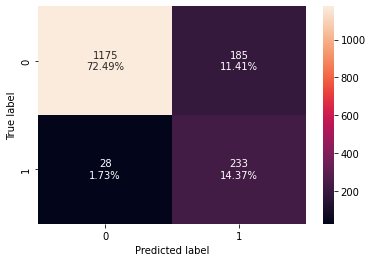

In [ ]:
#Calculating different metrics
rf_un_tuned_tr_perf=get_metrics(rf_un_tuned, X_train_un,y_train_un)
print("Training performance:\n", rf_un_tuned_tr_perf)
rf_un_tuned_val_perf=get_metrics(rf_un_tuned, X_val,y_val)
print("Validation performance:\n", rf_un_tuned_val_perf)
#Creating confusion matrix
con_mat(rf_un_tuned,X_val,y_val)

Hyperparameter tuning has reduced the recall score of the train set and made it closer to the recall score of the validation set, solving the overfitting issue to the great extent compared to the previous Random Forest models without hyperparameter tuning. The recall scores of all the sets are very close to each other and are high enough to say that they represent the real world data well. However, we should check the other two models to see if they are better than this or not. 

Note: In hyperparameter tuning, I should first find the model with the best recall performance by comparing the train set and validation set. Test set should not be used in this step in order to prevend data leakage. Only after the model with the best performance has been found, its recall score in validation set will be compared with the recall score in test set. 

##AdaBoost on Undersampled Data##

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
abc_un= AdaBoostClassifier(random_state=1)

# Now we are going to set the parameters

parameters2 = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized search
grid_obj2 = RandomizedSearchCV(abc_un, parameters2, n_iter=100, scoring=acc_scorer, cv=10, random_state = 1, n_jobs = -1)

# using n_iter = 50, so randomized search will try 50 different combinations of hyperparameters

grid_obj2 = grid_obj2.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj2.best_params_

{'n_estimators': 100,
 'learning_rate': 0.1,
 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

In [ ]:
# Now I can build the AdaBoost model based on the best combination of parameters found above

abc_un_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

abc_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.955812  0.955812   0.955812  0.955812
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.902529  0.904215   0.639566  0.749206


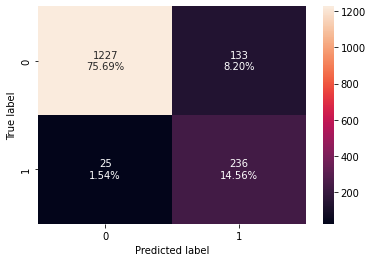

In [ ]:
#Calculating different metrics
abc_un_tuned_tr_perf=get_metrics(abc_un_tuned, X_train_un,y_train_un)
print("Training performance:\n", abc_un_tuned_tr_perf)
abc_un_tuned_val_perf=get_metrics(abc_un_tuned, X_val,y_val)
print("Validation performance:\n", abc_un_tuned_val_perf)
#Creating confusion matrix
con_mat(abc_un_tuned,X_val,y_val)

Recall scores of each set is very high, indicating that the model represents the real world data very well. Also, the false negative percentage is very low, showing that the model does a good job at detecting the customers who will not churn. However, the gap between the recall score of train set and that of validation set is a bit high especially considering that this is a model which was tuned after having been selected as one of the best three among 18 models. I would prefer the random forest model above instead of this one. Before that, I will check the performance of the XGBoost Model.  

##XGBoost on Undersampled Data##

In [ ]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgb_un = XGBClassifier(random_state=1,eval_metric='logloss')

In [ ]:
parameters3 = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    'max_depth':np.arange(1,5,1),
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1],
    'reg_lambda':[5,10]
    }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj3 = RandomizedSearchCV(xgb_un, parameters3, n_iter=70, scoring=acc_scorer, random_state=1, n_jobs = -1, cv=10)
grid_obj3 = grid_obj3.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj3.best_params_

{'subsample': 1,
 'scale_pos_weight': 5,
 'reg_lambda': 5,
 'n_estimators': 70,
 'max_depth': 3,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.5}

In [ ]:
# Now I can build the XGBoost model based on the best combination of parameters found above

xgb_un_tuned = XGBClassifier(
  subsample = 1,
  scale_pos_weight = 5,
  reg_lambda = 5,
  n_estimators = 70,
  max_depth = 3,
  learning_rate = 0.01,
  gamma = 0,
  colsample_bytree = 0.5,
  colsample_bylevel = 0.5
)

xgb_un_tuned.fit(X_train_un, y_train_un)

XGBClassifier(colsample_bylevel=0.5, colsample_bytree=0.5, learning_rate=0.01,
              n_estimators=70, reg_lambda=5, scale_pos_weight=5)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.681556  0.998079   0.611176  0.758117
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.426897  0.992337   0.218381  0.357982


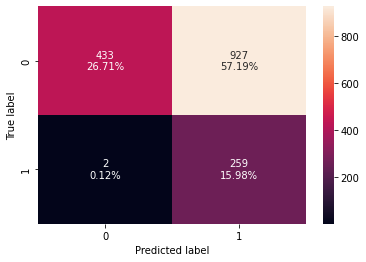

In [ ]:
#Calculating different metrics
xgb_un_tuned_tr_perf=get_metrics(xgb_un_tuned, X_train_un,y_train_un)
print("Training performance:\n", xgb_un_tuned_tr_perf)
xgb_un_tuned_val_perf=get_metrics(xgb_un_tuned, X_val,y_val)
print("Validation performance:\n", xgb_un_tuned_val_perf)
#Creating confusion matrix
con_mat(xgb_un_tuned,X_val,y_val)

This is an extremely good model. Recall scores of each set is extremely high and very close to each, having a difference of only 0.006. It means that the model represent the real world data very well (avoiding underfitting issue) without capturing noise (avoiding overfitting issue). Also, the false negative percentage is very low, being only 0.12 percent. It means that the model does an excellent job with detecting the customers who will not really churn. 

##Comparison of the Three Models##

In [ ]:
models_tuned_train_comp= pd.concat(
    [rf_un_tuned_tr_perf.T, abc_un_tuned_tr_perf.T, xgb_un_tuned_tr_perf.T],
    axis=1,
)
models_tuned_train_comp.columns = [
    "Random Forest Undersampled",
    "Adaboost Undersampled",
    "XGBoost Undersampled"]
print("Training performance comparison:")
models_tuned_train_comp

Training performance comparison:


,Random Forest Undersampled,Adaboost Undersampled,XGBoost Undersampled
Accuracy,0.889049,0.955812,0.681556
Recall,0.891451,0.955812,0.998079
Precision,0.887189,0.955812,0.611176
F1,0.889315,0.955812,0.758117


In [ ]:
models_tuned_val_comp= pd.concat(
    [rf_un_tuned_val_perf.T, abc_un_tuned_val_perf.T, xgb_un_tuned_val_perf.T],
    axis=1,
)
models_tuned_val_comp.columns = [
    "Random Forest Undersampled",
    "Adaboost Undersampled",
    "XGBoost Undersampled"]
print("Validation performance comparison:")
models_tuned_val_comp

Validation performance comparison:


,Random Forest Undersampled,Adaboost Undersampled,XGBoost Undersampled
Accuracy,0.868600,0.902529,0.426897
Recall,0.892720,0.904215,0.992337
Precision,0.557416,0.639566,0.218381
F1,0.686303,0.749206,0.357982


##Decision on the Best Model##

The best model among the three above is obviously the Tuned XGBoost Model on Undersampled Data. Its recall scores in train and validation sets are significantly higher than those in the other two models. More importantly, the recall score in train set is very close to the one in validation set in XGBoost. Although Random Forest model has the same similarity in terms of recall scores, those are significantly lower (0.89 in RF vs. 0.99 in XGBoost). Therefore, the winner is XGBoost model. Now, I will compare its validation recall score with the testing recall score.

##Comparing the Winner Model's Validation Set with Its Testing Set##

In [ ]:
xgb_un_tuned_val_perf=get_metrics(xgb_un_tuned, X_val,y_val)
print("Validation performance:\n", xgb_un_tuned_val_perf)
xgb_un_tuned_te_perf=get_metrics(xgb_un_tuned, X_test,y_test)
print('Testing performance:\n', xgb_un_tuned_te_perf)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.426897  0.992337   0.218381  0.357982
Testing performance:
    Accuracy  Recall  Precision       F1
0  0.418559     1.0   0.216234  0.35558


As we can see, testing recall score is 1, whereas validation recall score is 0.99. In other words, they are very close to each other, indicating that there is no overfitting. This model represents the real data in testing set extremely well and without capturing noise in the context of detecting false negatives (the customers who will not churn), which is the main purpose of the bank.

##Feature Importance##

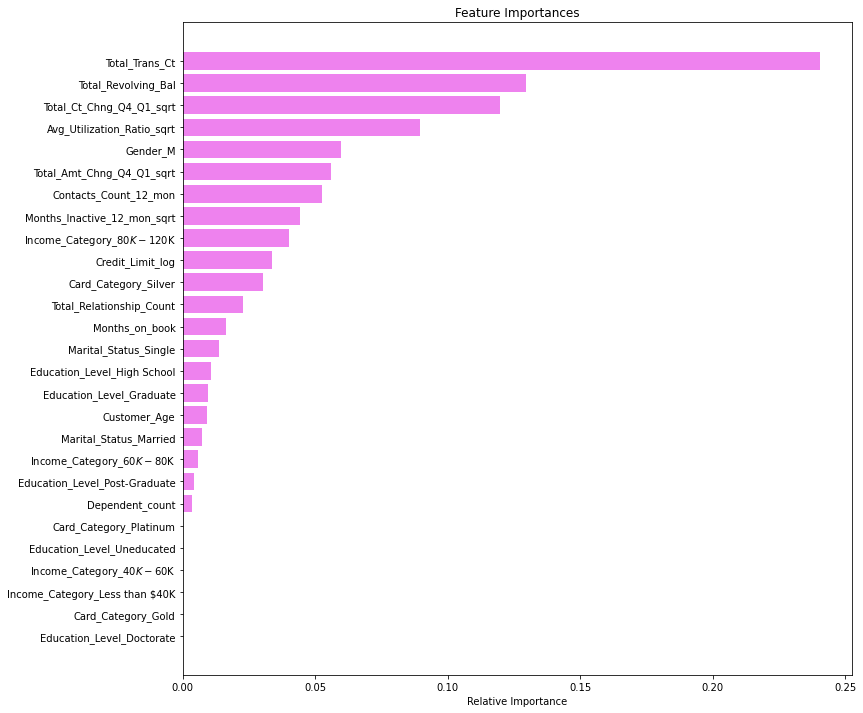

In [ ]:
feature_names = X_train_un.columns
importances = xgb_un_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Creating a Final Model using Pipelines#

In [ ]:
pipeline_xgb_tuned = Pipeline([
    ('scaler',StandardScaler()), # I will use Standard Scaler, not MinMaxScaler, because my features are normally distributed
    ('XGB', XGBClassifier(
  subsample = 1,
  scale_pos_weight = 5,
  reg_lambda = 5,
  n_estimators = 70,
  max_depth = 3,
  learning_rate = 0.01,
  gamma = 0,
  colsample_bytree = 0.5,
  colsample_bylevel = 0.5),
),]
)


In [ ]:
pipeline_xgb_tuned.fit(X_train_un,y_train_un)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(colsample_bylevel=0.5, colsample_bytree=0.5,
                               learning_rate=0.01, n_estimators=70,
                               reg_lambda=5, scale_pos_weight=5))])

In [ ]:
pipeline_xgb_tuned.score(X_train_un, y_train_un)

0.6815561959654178

This shows the accuracy score of the final pipeline model which includes the tuned XGBClassifier. The accuracy score in the pipeline model matches with the one in tuned XGBoost model created above.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.681556  0.998079   0.611176  0.758117
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.426897  0.992337   0.218381  0.357982
Testing performance:
    Accuracy  Recall  Precision       F1
0  0.418559     1.0   0.216234  0.35558


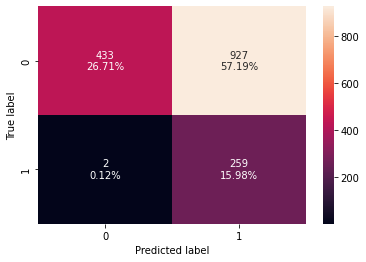

In [ ]:
#Calculating different metrics
pipeline_xgb_tuned_tr_perf=get_metrics(pipeline_xgb_tuned, X_train_un,y_train_un)
print("Training performance:\n", pipeline_xgb_tuned_tr_perf)
pipeline_xgb_tuned_val_perf=get_metrics(pipeline_xgb_tuned, X_val,y_val)
print("Validation performance:\n", pipeline_xgb_tuned_val_perf)
pipeline_xgb_tuned_te_perf=get_metrics(pipeline_xgb_tuned, X_test,y_test)
print('Testing performance:\n', pipeline_xgb_tuned_te_perf)
#Creating confusion matrix
con_mat(pipeline_xgb_tuned,X_val,y_val)

#Business Insights and Recommendations#



*  The most important variable associated with customer attrition is the count of total transaction made by a customer in last 12 months. Customers with higher total transaction count in last 12 months are more likely to stick with the Thera bank compared to those with lower total transaction count. The high number of transaction a customer makes shows the customer's high frequency of card use

*  The second most important variable associated with customer attrition is total revolving balance that a customer has. The balance that carries over from one month to the next was lower in the attrited customers compared to existing customers. The balance that carries over from one month to the next is generally the indication of two things: either that a customer is not able to pay his monthly balance or that there is an installment plan on a purchase. In both cases, the customer is legally bound to the bank, because it would hurt his credit score or financial credibility, if he does default on those unpaid balances. Moreover, high total revolving balance shows that the customer uses the card actively. That is why the customers with higher total revolving balance are less likely to leave the card services.

*  Other variables that were associated with customer attrition was the ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter and average utilization ratio. As they increase, the chance of attrition decreases. 

*  The results and insights above show that a customer's active use of a credit card service increases the chance that a customer will keep sticking with the Thera bank. Therefore, my suggestion would be that the bank should find ways to make a customer actively use a credit card. For instance, the Thera bank can offer more services and benefits that would increase transactions, such as cash backs for certain purchases from popular brands or gas stations, so customers will keep using the card for transaction. 

*  The bank can try to increase the total revolving balance of customers by offering good installment plans (e.g., installment with zero APR or 12-month, 24-month installment plans), so customers with installment plans will keep sticking with the same bank.

*  The number of contacts between the customer and the bank was higher in the customers that left the bank compared to that in existing customers. Also, customers from the both end of SES (i.e., those above 120K and those below 40K) had the highest attrition rate. Perhaps, it is because neither of the two groups find the card services and offers satisfactory for their own specific reasons. The bank should look at the call records of the customers from the income groups mentioned above and find out what the contact with them was about. In other words, the bank should try to understand why especially those two income groups wanted to leave the card services by looking at the call records. 

*   The highest attrition rate is among the Platinum card users and Gold card users. The bank should find out why. They may want to expand the services, offers, and promotions exclusive to Platinum card users or decrease the annual fee if it is too high. A person who has a Platinum or Gold card would have higher expectations from such cards, so the bank should find out what those expectations are and how they can be met. Call records can be listened and analyzed.

*   Gender or marital status has not been found to be associated with attrition rate.






